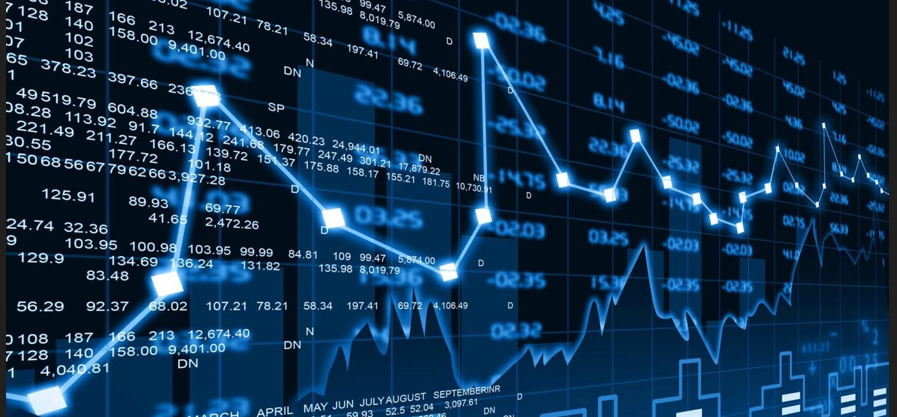



# Introducción

La Ciencia de Datos es un campo en rápido crecimiento que combina herramientas estadísticas y computacionales para extraer conocimiento valioso a partir de los datos. Esta disciplina integra áreas como matemáticas, estadística, informática y conocimientos específicos del dominio financiero, generando un enfoque integral para entender patrones complejos.

El propósito principal de la Ciencia de Datos es ofrecer una visión completa de los datos y transformarla en información accionable que facilite decisiones empresariales, descubrimientos científicos e incluso políticas públicas. En un mundo donde la generación de datos es constante y masiva, esta disciplina se vuelve cada vez más esencial para comprender nuestro entorno basado en datos.

En el ámbito financiero, la Ciencia de Datos se puede aplicar de diversas formas, tales como:

1. **Modelos Predictivos:** Los profesionales en Ciencia de Datos pueden utilizar datos históricos para construir modelos que identifiquen tendencias y realicen predicciones sobre las condiciones futuras del mercado.

2. **Trading Algorítmico:** El uso de algoritmos permite ejecutar órdenes de compra y venta de forma automática, basándose en modelos matemáticos que analizan precio, volumen, volatilidad, entre otros factores.

3. **Optimización de Portafolios:** A través de algoritmos y modelos matemáticos, se pueden construir portafolios financieros que maximicen los retornos esperados mientras minimizan los riesgos.

4. **Detección de Fraudes:** Los científicos de datos pueden aplicar algoritmos de aprendizaje automático para identificar actividades fraudulentas en transacciones financieras.

5. **Gestión de Riesgos:** La Ciencia de Datos permite cuantificar y gestionar diferentes tipos de riesgo financiero, como riesgo de mercado, de crédito y operativo.

6. **Análisis de Clientes:** Las instituciones financieras pueden analizar el comportamiento y las preferencias de sus clientes para mejorar la retención, la personalización de servicios y la experiencia general del usuario.

---

## Objetivo del Notebook

Este cuaderno tiene como objetivo mostrar cómo la Ciencia de Datos, junto con Python, puede ser una herramienta poderosa para extraer información valiosa de los mercados financieros. A lo largo del notebook, se demostrará cómo utilizar estas herramientas para construir y optimizar portafolios, desarrollar estrategias de inversión efectivas y realizar análisis detallado de acciones.

Con esto se busca resaltar la versatilidad y utilidad de aplicar Ciencia de Datos y Python en el sector financiero, brindando un recurso valioso para quienes desean tomar decisiones de inversión fundamentadas en datos.


## Librerías utilizadas

A lo largo de este proyecto se utilizarán diversas bibliotecas de Python ampliamente reconocidas en el ámbito de las finanzas cuantitativas y la ciencia de datos. Estas herramientas permiten desde la descarga de datos financieros hasta su visualización, análisis estadístico, optimización de portafolios y creación de modelos predictivos. A continuación, se describen brevemente:

- **NumPy**: Librería fundamental para operaciones numéricas y manejo de arrays.
- **Pandas**: Herramienta esencial para la manipulación y análisis de datos estructurados, como series temporales financieras.
- **Matplotlib** y **Seaborn**: Bibliotecas de visualización de datos, utilizadas para representar gráficamente precios, rendimientos, distribuciones, correlaciones, etc.
- **yfinance**: Permite descargar datos financieros históricos de Yahoo Finance de forma sencilla y rápida.
- **Plotly**: Ideal para generar gráficos interactivos de alta calidad, útiles para presentar análisis.
- **Statsmodels**: Biblioteca especializada en modelos estadísticos y pruebas econométricas.
- **Scikit-learn**: Conjunto completo de algoritmos de machine learning para tareas de clasificación, regresión y clustering.
- **PyPortfolioOpt**: Implementa algoritmos de optimización moderna de portafolios como media-varianza y frontera eficiente.
- **QuantStats**: Genera análisis de desempeño de portafolios con estadísticas, gráficos y reportes automáticos.
- **TA (Technical Analysis Library)**: Biblioteca con indicadores técnicos clásicos para análisis de trading, como RSI, MACD, Bollinger Bands, entre otros.


In [183]:
#Aquí instalamos yfinance:
!pip install yfinance --upgrade

In [184]:
# Instalando Quantstats
!pip install quantstats --upgrade

In [185]:
# Instalando PyPortfolioOpt
!pip install pyportfolioopt --upgrade

In [186]:
# Instalando TA (Technical Analysis) para análisis técnico
!pip install ta --upgrade

In [187]:
!pip install ace_tools # installing the required library to resolve ModuleNotFoundError

In [188]:
# Aquí importamos otras librerías que nos serán de utiliad para el análisis

# Manejo de datos y análisis estadístico
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimización y asignación
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel



# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Para habilitar Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime y warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [189]:
# Financial data
import quantstats as qs
import ta
import yfinance as yf

## Selección de acciones para el análisis

Para este estudio, se ha elegido un conjunto de cuatro acciones pertenecientes a distintas industrias clave del mercado estadounidense. El objetivo es comparar su comportamiento en términos de rendimientos diarios, permitiendo observar patrones de volatilidad, consistencia en el crecimiento y posibles correlaciones entre sectores. Las empresas seleccionadas son:

- **AAPL (Apple Inc.)**: Referente del sector tecnológico y de consumo, combina innovación en hardware, software y servicios digitales.
- **MSFT (Microsoft Corp.)**: Empresa líder en software empresarial, servicios en la nube y soluciones tecnológicas globales.
- **NVDA (Nvidia Corp.)**: Actor principal en el desarrollo de semiconductores y procesamiento gráfico, altamente relevante en el contexto de inteligencia artificial y computación acelerada.
- **JPM (JPMorgan Chase & Co.)**: El banco más grande de Estados Unidos por activos, representando el sector financiero tradicional.

Esta combinación permite contrastar el desempeño de empresas tecnológicas con una entidad financiera, y observar cómo reaccionan ante diferentes condiciones de mercado, generando así un análisis más robusto y realista.

A continuación, se descargan los datos históricos de precios para el periodo comprendido entre el **1 de enero de 2023** y el **31 de marzo de 2025**. Se utiliza la biblioteca `yfinance` con el parámetro `auto_adjust=False` para mantener explícitamente la columna `'Adj Close'`, que representa el precio ajustado de cierre, utilizado comúnmente para calcular rendimientos y análisis posteriores.


## 1 | Primeros pasos: Retornos diarios

Una de las primeras métricas que analizaremos es el **retorno diario**, que representa el cambio porcentual en el precio de una acción de un día al siguiente. Este indicador es fundamental porque permite observar cómo varía el valor de un activo en cortos periodos de tiempo, facilitando el análisis de su comportamiento reciente.

El cálculo se realiza restando el precio de cierre del día anterior al del día actual, dividiendo esa diferencia entre el precio de cierre anterior y multiplicando el resultado por 100 para expresarlo en porcentaje.

Por ejemplo, si una acción cierra el lunes en 100 dólares y el martes en 102 dólares, su retorno diario se calcula así:

$$
\left( \frac{102 - 100}{100} \right) \times 100 = 2\%
$$

Esto indica que el valor de la acción aumentó un 2% en un solo día.

Por el contrario, si la acción hubiese cerrado en 98 dólares el martes, el retorno diario sería:

$$
\left( \frac{98 - 100}{100} \right) \times 100 = -2\%
$$

Lo cual refleja una disminución del 2% en su valor respecto al día anterior.

Los retornos diarios son especialmente útiles para los inversionistas, ya que permiten monitorear de forma rápida y continua la evolución de un activo, evaluar su volatilidad y consistencia, y tomar decisiones informadas a partir del comportamiento reciente del mercado.


In [190]:
import yfinance as yf
import pandas as pd

# Definir fechas
start_date = '2023-01-01'
end_date = '2025-03-31'

# Descargar datos uno por uno con auto_adjust=False
aapl = yf.download('AAPL', start=start_date, end=end_date, auto_adjust=False)
aapl['Ticker'] = 'AAPL'

msft = yf.download('MSFT', start=start_date, end=end_date, auto_adjust=False)
msft['Ticker'] = 'MSFT'

nvda = yf.download('NVDA', start=start_date, end=end_date, auto_adjust=False)
nvda['Ticker'] = 'NVDA'

jpm = yf.download('JPM', start=start_date, end=end_date, auto_adjust=False)
jpm['Ticker'] = 'JPM'

# Mostrar las primeras filas de AAPL como ejemplo
aapl.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Ticker
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2023-01-03,123.632523,125.070000,130.899994,124.169998,130.279999,112117500,AAPL
2023-01-04,124.907700,126.360001,128.660004,125.080002,126.889999,89113600,AAPL
2023-01-05,123.583099,125.019997,127.769997,124.760002,127.129997,80962700,AAPL
2023-01-06,128.130219,129.619995,130.289993,124.889999,126.010002,87754700,AAPL
2023-01-09,128.654144,130.149994,133.410004,129.889999,130.470001,70790800,AAPL


##Obtenemos ahora los retornos díarios para cada una de las acciones elegidas

In [191]:
#APPLE
aapl=qs.utils.download_returns('AAPL')
aapl=aapl.loc['2023-01-03':'2025-03-28']

In [192]:
#MSFT
msft=qs.utils.download_returns('MSFT')
msft=msft.loc['2023-01-03':'2025-03-28']

In [193]:
#NVDA
nvda=qs.utils.download_returns('NVDA')
nvda=nvda.loc['2023-01-03':'2025-03-28']

In [194]:
#JPM
jpm=qs.utils.download_returns('JPM')
jpm=jpm.loc['2023-01-03':'2025-03-28']

In [195]:
jpm.size

561

In [196]:
# Trabajando la zona horaria


aapl.index = aapl.index.tz_localize('America/New_York').tz_convert(None)
msft.index = msft.index.tz_localize('America/New_York').tz_convert(None)
nvda.index = nvda.index.tz_localize('America/New_York').tz_convert(None)
jpm.index = jpm.index.tz_localize('America/New_York').tz_convert(None)

## Ahora ya podemos graficar los retornos diarios para cada Stock

In [154]:
#JPM
!pip install yfinance
!pip install quantstats
import yfinance as yf
import quantstats as qs
import pandas as pd

# Downloading JPM's data using yfinance and handling errors
try:
  jpm = yf.download('JPM', start='2023-01-03', end='2025-03-28')['Adj Close']
  jpm = jpm.pct_change()  # Calculate daily returns
except Exception as e:
  print(f"Error downloading or processing JPM data: {e}")
  # Handle the error, e.g., exit or use default data

aapl = yf.download('AAPL', start='2023-01-03', end='2025-03-28')['Adj Close']
aapl = aapl.pct_change()  # Calculate daily returns
msft = yf.download('MSFT', start='2023-01-03', end='2025-03-28')['Adj Close']
msft = msft.pct_change()  # Calculate daily returns
nvda = yf.download('NVDA', start='2023-01-03', end='2025-03-28')['Adj Close']
nvda = nvda.pct_change()  # Calculate daily returns


# Working with the time zone
aapl.index = aapl.index.tz_localize('America/New_York').tz_convert(None)
msft.index = msft.index.tz_localize('America/New_York').tz_convert(None)
nvda.index = nvda.index.tz_localize('America/New_York').tz_convert(None)
jpm.index = jpm.index.tz_localize('America/New_York').tz_convert(None)


# Plotting daily returns for Apple
print('\n')
print('\nRetornos diarios Apple:\n')
qs.plots.daily_returns(aapl, benchmark=None)

ERROR: Operation cancelled by user


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Error downloading or processing JPM data: 'Adj Close'


KeyError: 'Adj Close'

In [197]:
#GPT
import yfinance as yf
import pandas as pd

def obtener_retorno_diario(ticker, start='2023-01-03', end='2025-03-28'):
    """
    Descarga el precio ajustado de cierre de una acción, calcula el retorno diario
    y ajusta la zona horaria a formato naive.

    Parámetros:
    - ticker (str): símbolo de la acción (por ejemplo, 'AAPL').
    - start (str): fecha de inicio en formato 'YYYY-MM-DD'.
    - end (str): fecha de fin en formato 'YYYY-MM-DD'.

    Retorna:
    - pd.Series: serie de retornos diarios.
    """
    try:
        datos = yf.download(ticker, start=start, end=end, auto_adjust=False)['Adj Close']
        retornos = datos.pct_change()
        retornos.index = retornos.index.tz_localize('America/New_York').tz_convert(None)
        print(f"✅ Datos procesados correctamente para {ticker}")
        return retornos
    except Exception as e:
        print(f"❌ Error con {ticker}: {e}")
        return pd.Series(dtype='float64')  # Retorna serie vacía si hay error


In [198]:
aapl = obtener_retorno_diario('AAPL')
msft = obtener_retorno_diario('MSFT')
nvda = obtener_retorno_diario('NVDA')
jpm = obtener_retorno_diario('JPM')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

✅ Datos procesados correctamente para AAPL
✅ Datos procesados correctamente para MSFT
✅ Datos procesados correctamente para NVDA
✅ Datos procesados correctamente para JPM


In [199]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

def graficar_retorno_diario_matplotlib(ticker, start='2023-01-03', end='2025-03-28'):
    try:
        # Descargar precios
        df = yf.download(ticker, start=start, end=end, auto_adjust=False)
        if df.empty:
            raise ValueError("Datos vacíos")

        # Calcular retornos
        returns = df['Adj Close'].pct_change().dropna()
        returns.index = pd.to_datetime(returns.index)

        # Graficar
        plt.figure(figsize=(12, 5))
        plt.plot(returns, label=f'Retorno diario: {ticker}', linewidth=0.7)
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
        plt.title(f'Retorno diario de {ticker}')
        plt.xlabel('Fecha')
        plt.ylabel('Retorno diario')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error al procesar {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed


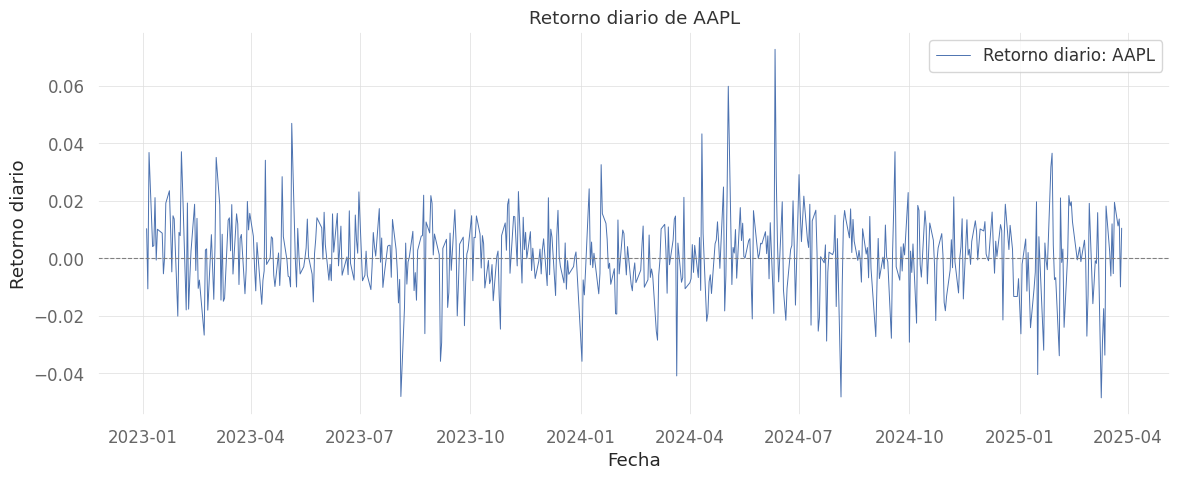

[*********************100%***********************]  1 of 1 completed


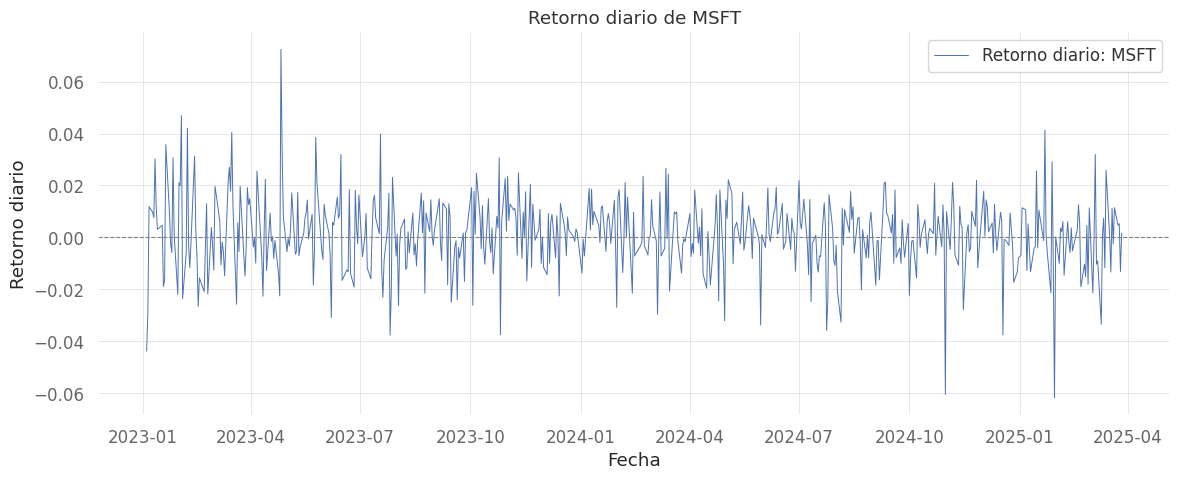

[*********************100%***********************]  1 of 1 completed


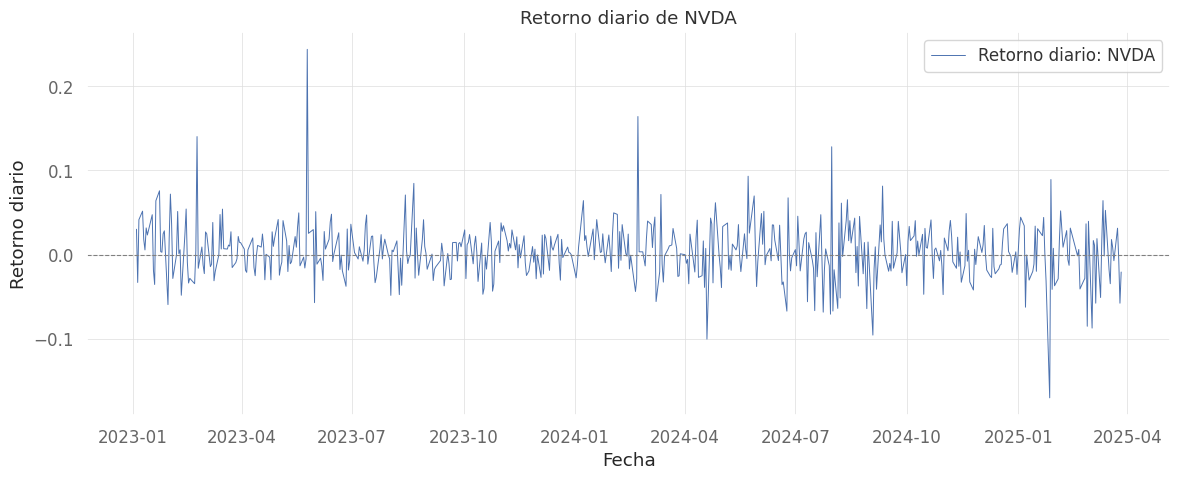

[*********************100%***********************]  1 of 1 completed


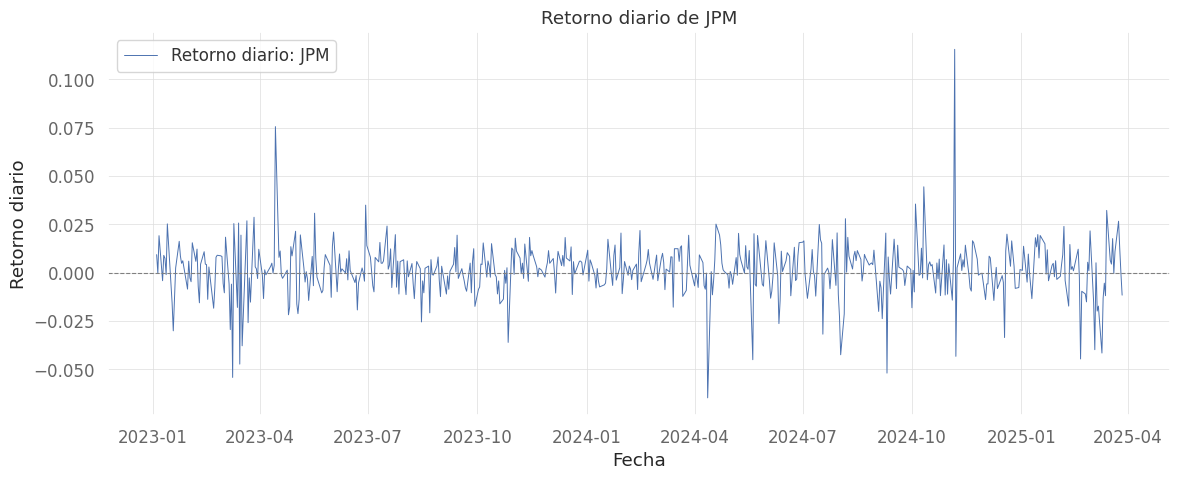

In [200]:
graficar_retorno_diario_matplotlib('AAPL')
graficar_retorno_diario_matplotlib('MSFT')
graficar_retorno_diario_matplotlib('NVDA')
graficar_retorno_diario_matplotlib('JPM')


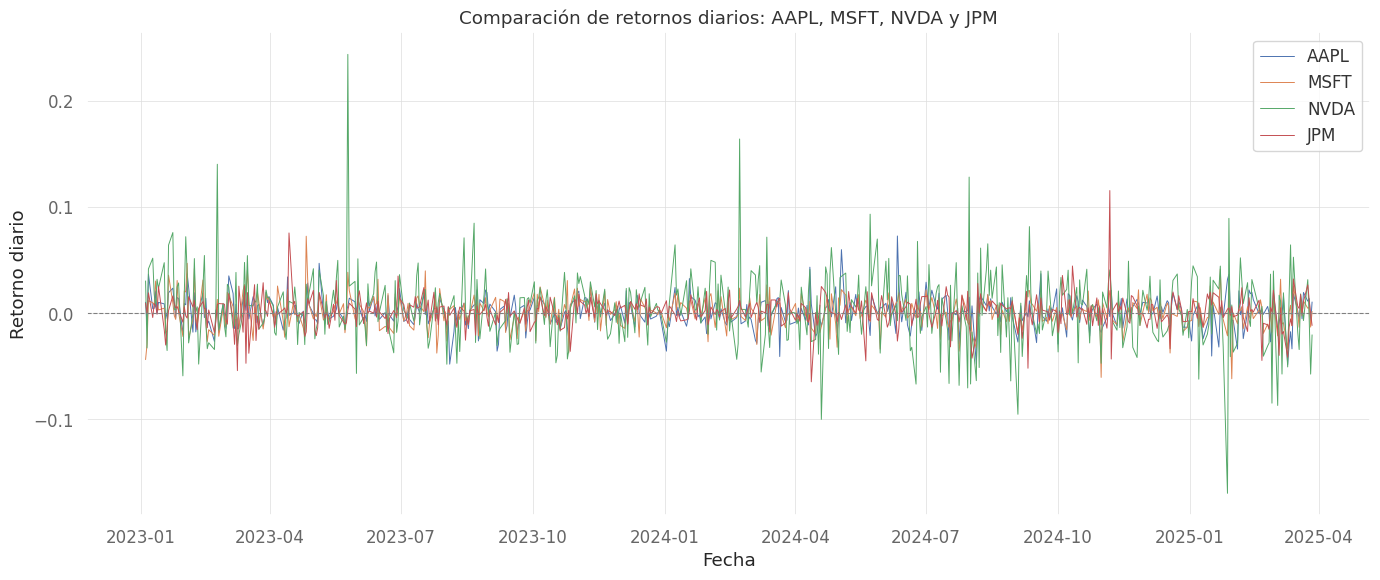

In [201]:
# Unirlos en un DataFrame para comparación
retornos_df = pd.concat([aapl, msft, nvda, jpm], axis=1)
retornos_df.columns = ['AAPL', 'MSFT', 'NVDA', 'JPM']

# Graficar
plt.figure(figsize=(14, 6))
for columna in retornos_df.columns:
    plt.plot(retornos_df[columna], label=columna, linewidth=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Comparación de retornos diarios: AAPL, MSFT, NVDA y JPM')
plt.xlabel('Fecha')
plt.ylabel('Retorno diario')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A simple vista es muy claro que NVDA es la serie más volátil de las cuatro observadas, eso quiere decir que es muy riesgosa sin embargo también podría generar buenos retornos.

## Retornos acumulados

El **retorno acumulado** de una acción representa el crecimiento total de una inversión durante un periodo determinado, teniendo en cuenta el efecto del interés compuesto. Para calcularlo, se parte del precio inicial y del precio final de la acción, considerando también los dividendos u otros ingresos si están disponibles.

Este tipo de retorno es más representativo que la simple suma de retornos diarios, ya que incorpora el efecto de **reinversión de las ganancias**. En otras palabras, cada ganancia obtenida se reinvierte automáticamente, generando nuevas ganancias sobre los rendimientos anteriores.

Matemáticamente, el retorno acumulado se puede obtener a partir de los retornos diarios usando la siguiente fórmula compuesta:

$$
\text{Retorno acumulado} = \prod_{t=1}^{T} (1 + r_t) - 1
$$

donde \( r_t \) representa el retorno diario en el día \( t \). El resultado se expresa como proporción o como porcentaje si se multiplica por 100.

A continuación se presenta un gráfico comparativo de los retornos acumulados de cuatro acciones: Apple (AAPL), Microsoft (MSFT), Nvidia (NVDA) y JPMorgan (JPM), desde enero de 2023 hasta marzo de 2025.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


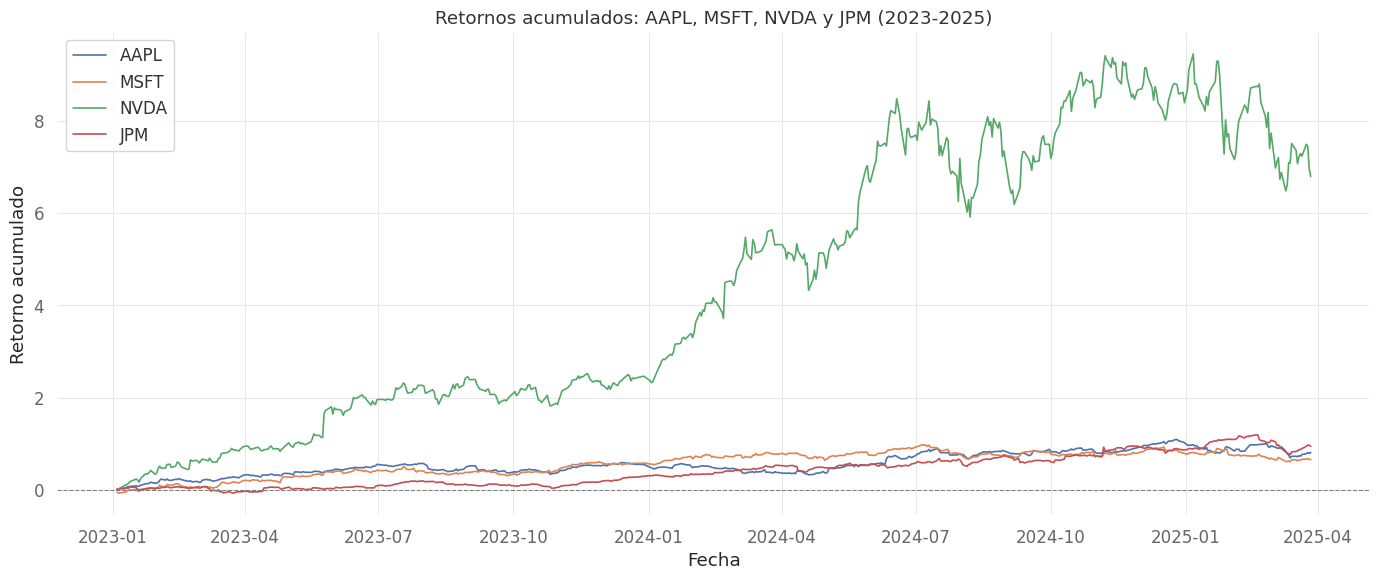

In [202]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Función para obtener retornos diarios
def obtener_retorno_diario(ticker, start='2023-01-03', end='2025-03-28'):
    df = yf.download(ticker, start=start, end=end, auto_adjust=False)
    returns = df['Adj Close'].pct_change().dropna()
    returns.index = pd.to_datetime(returns.index)
    return returns

# Descargar y calcular retornos diarios
aapl = obtener_retorno_diario('AAPL')
msft = obtener_retorno_diario('MSFT')
nvda = obtener_retorno_diario('NVDA')
jpm = obtener_retorno_diario('JPM')

# Combinar retornos en un solo DataFrame
retornos = pd.concat([aapl, msft, nvda, jpm], axis=1)
retornos.columns = ['AAPL', 'MSFT', 'NVDA', 'JPM']

# Calcular retornos acumulados
retornos_acumulados = (1 + retornos).cumprod() - 1

# Graficar
plt.figure(figsize=(14, 6))
for columna in retornos_acumulados.columns:
    plt.plot(retornos_acumulados[columna], label=columna, linewidth=1.2)

plt.title('Retornos acumulados: AAPL, MSFT, NVDA y JPM (2023-2025)')
plt.xlabel('Fecha')
plt.ylabel('Retorno acumulado')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Observasiones de los retornos acumulados (2023–2025)

El gráfico de retornos acumulados revela diferencias notables entre las cuatro acciones analizadas. Desde una perspectiva cuantitativa o de trading, estas observaciones son clave para interpretar riesgos, oportunidades y comportamiento del mercado:

### Nvidia (NVDA): rendimiento explosivo y perfil de alto crecimiento

Nvidia muestra un rendimiento acumulado claramente superior, multiplicando su valor inicial por más de 8 veces en el periodo observado. Esta trayectoria sugiere una fuerte tendencia alcista impulsada por la narrativa de la inteligencia artificial, su liderazgo en semiconductores y posiblemente resultados financieros sobresalientes.

Desde un enfoque **quant**, este tipo de comportamiento es típico de activos que podrían aprovecharse mediante estrategias de **momentum o trend-following**, pero también implica **mayor volatilidad y riesgo**. El uso de técnicas de control de riesgo como **stops dinámicos, drawdowns o modelos GARCH** sería recomendable al operar con NVDA.

### Apple (AAPL) y Microsoft (MSFT): crecimiento estable y correlacionado

Ambas compañías muestran un crecimiento acumulado moderado, con trayectorias bastante similares. Este comportamiento es característico de **acciones defensivas dentro del sector tecnológico**, utilizadas frecuentemente para diversificar carteras. Su volatilidad es menor en comparación con NVDA, lo cual las hace atractivas para estrategias de **inversión a largo plazo** o **portafolios balanceados**.

### JPMorgan (JPM): comportamiento predecible y menor rendimiento

JPM presenta el menor rendimiento acumulado entre los cuatro activos, lo cual es coherente con su naturaleza como banco tradicional. Aunque menos rentable, su curva es más estable, lo que puede resultar útil en escenarios de alta incertidumbre o como **activo contracíclico** dentro de una estrategia de cobertura.

---

### Conclusión

Este tipo de análisis visual y cuantitativo es fundamental para identificar oportunidades y tomar decisiones informadas. En este caso, **NVDA destaca por su agresivo crecimiento**, mientras que **AAPL y MSFT actúan como pilares de estabilidad**. JPM, por su parte, aporta **previsibilidad en contextos de diversificación sectorial**.

Este contraste ofrece múltiples posibilidades para diseñar **estrategias de trading, optimización de portafolios o análisis de riesgo**, según el perfil y objetivo del inversionista.


## Histogramas de retornos diarios

Los **histogramas** son herramientas visuales que permiten observar la distribución de los valores en un conjunto de datos. En el contexto financiero, son particularmente útiles para analizar la **distribución de los retornos diarios** de una acción.

Al graficar histogramas de retornos, podemos identificar:

- **Rango de variación** de los retornos diarios.
- **Asimetría** o sesgo (si los retornos son más frecuentes hacia el lado positivo o negativo).
- **Kurtosis** (colas pesadas o concentración cerca de la media).
- Nivel general de **volatilidad**.

En este análisis, se presentan los histogramas de los retornos diarios de Apple (AAPL), Microsoft (MSFT), Nvidia (NVDA) y JPMorgan (JPM) entre enero de 2023 y marzo de 2025. Estos gráficos permiten comparar la **estabilidad** y **comportamiento estadístico** de cada acción.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


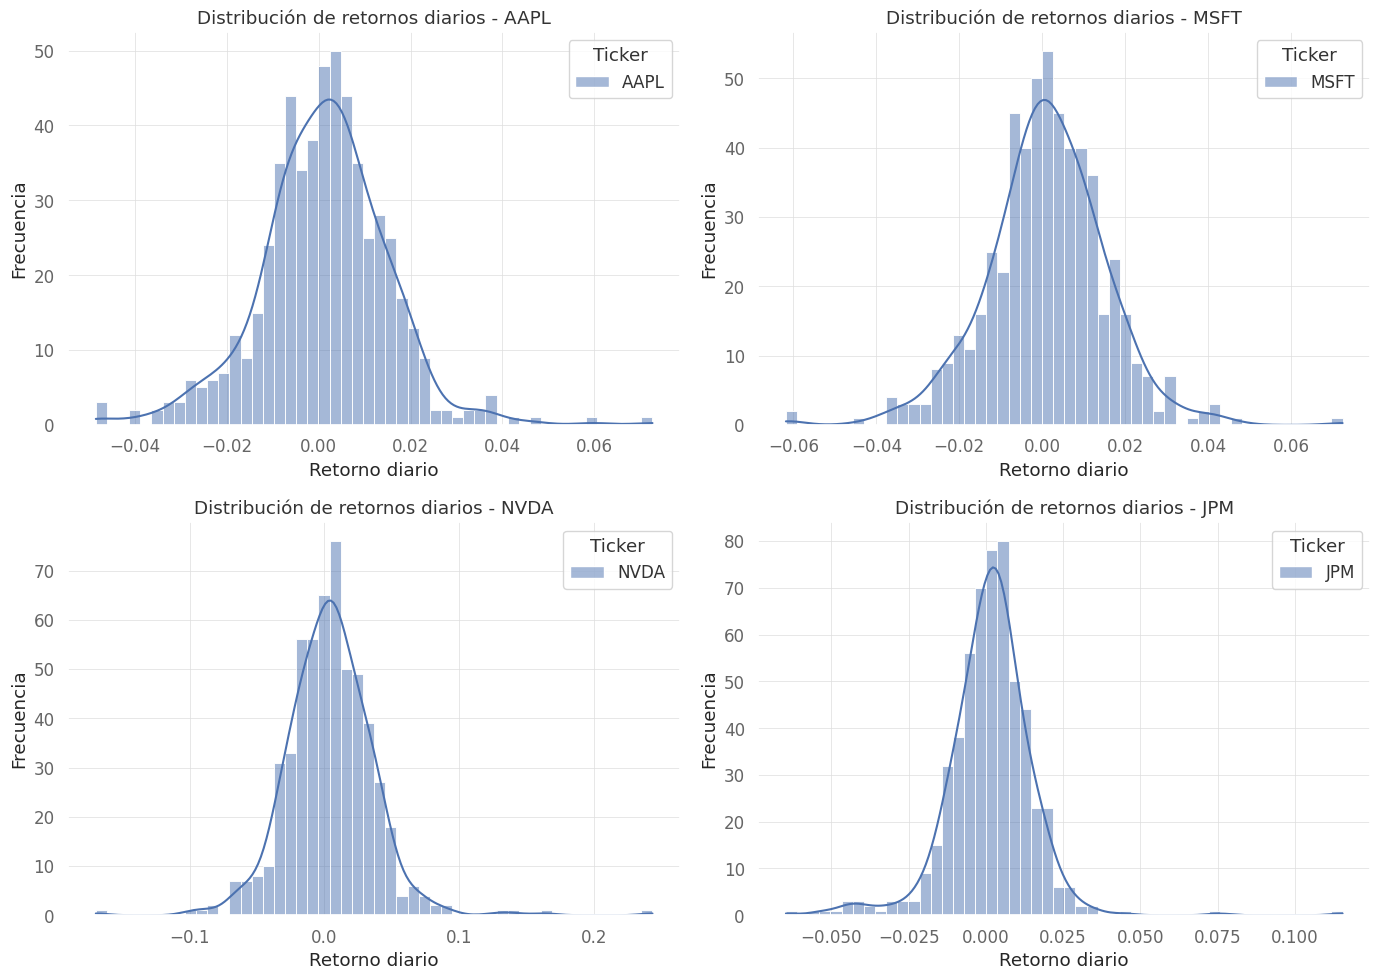

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd

# Función para obtener retornos diarios
def obtener_retorno_diario(ticker, start='2023-01-03', end='2025-03-28'):
    df = yf.download(ticker, start=start, end=end, auto_adjust=False)
    returns = df['Adj Close'].pct_change().dropna()
    returns.index = pd.to_datetime(returns.index)
    return returns

# Descargar retornos
aapl = obtener_retorno_diario('AAPL')
msft = obtener_retorno_diario('MSFT')
nvda = obtener_retorno_diario('NVDA')
jpm  = obtener_retorno_diario('JPM')

# Crear figura con subplots
plt.figure(figsize=(14, 10))

# Histograma AAPL
plt.subplot(2, 2, 1)
sns.histplot(aapl, bins=50, kde=True, color='steelblue')
plt.title('Distribución de retornos diarios - AAPL')
plt.xlabel('Retorno diario')
plt.ylabel('Frecuencia')
plt.grid(True)

# Histograma MSFT
plt.subplot(2, 2, 2)
sns.histplot(msft, bins=50, kde=True, color='orange')
plt.title('Distribución de retornos diarios - MSFT')
plt.xlabel('Retorno diario')
plt.ylabel('Frecuencia')
plt.grid(True)

# Histograma NVDA
plt.subplot(2, 2, 3)
sns.histplot(nvda, bins=50, kde=True, color='green')
plt.title('Distribución de retornos diarios - NVDA')
plt.xlabel('Retorno diario')
plt.ylabel('Frecuencia')
plt.grid(True)

# Histograma JPM
plt.subplot(2, 2, 4)
sns.histplot(jpm, bins=50, kde=True, color='red')
plt.title('Distribución de retornos diarios - JPM')
plt.xlabel('Retorno diario')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()


## Análisis de histogramas: distribución y riesgo extremo

Los histogramas de retornos diarios permiten observar la forma en que se distribuyen las ganancias y pérdidas de una acción a lo largo del tiempo. En este análisis, se destacan algunas características clave que tienen implicaciones importantes para el manejo de riesgo y la estrategia de inversión.

### NVDA: colas pesadas y eventos extremos

El histograma de **Nvidia (NVDA)** revela una distribución con **colas más largas** que las de las otras acciones, lo cual indica la presencia de **eventos extremos o retornos inusualmente grandes**, tanto positivos como negativos.

Desde una perspectiva cuantitativa, este fenómeno se asocia con:

- **Colas pesadas (fat tails)**: mayor probabilidad de movimientos extremos en comparación con una distribución normal.
- **Asimetría leve hacia la derecha**, indicando que los eventos de ganancias muy altas han sido más frecuentes que las pérdidas extremas.
- **Alta curtosis**, lo que significa que los valores tienden a concentrarse fuertemente cerca de la media, pero con una mayor frecuencia de desviaciones extremas en los extremos.

Este patrón es típico de activos con alta sensibilidad a noticias tecnológicas, lanzamientos disruptivos o ciclos de hype, y puede ser reflejo del **efecto Black Swan**: eventos impredecibles con gran impacto, como una aceleración en la demanda de chips para inteligencia artificial o, por el contrario, un desplome repentino por exceso de valoración.

### JPM, AAPL y MSFT: distribución más normal

En contraste, **JPM**, **AAPL** y **MSFT** muestran distribuciones que se asemejan más a una **curva normal (gaussiana)**, lo que indica un comportamiento más **estable y predecible**. Las colas son más delgadas, y no hay tantos outliers extremos como en el caso de NVDA. Esto los convierte en activos más adecuados para estrategias conservadoras o modelos estadísticos tradicionales como la **VaR normal**.

---

### Conclusión

Este análisis visual de la distribución nos permite entender que **no todos los activos se comportan igual**, y que aplicar el mismo modelo de riesgo a todos puede ser inapropiado. En activos como NVDA, donde los retornos extremos son frecuentes, es necesario usar herramientas más robustas, como:

- **Modelos no paramétricos de riesgo**
- **Stress testing**
- **Simulaciones de Monte Carlo**
- **Análisis bajo distribuciones de colas pesadas (t-student, Pareto, etc.)**

Incluir estos elementos mejora la capacidad de anticipar eventos raros pero devastadores — los llamados **cisnes negros** — y construir portafolios realmente resistentes.


## Análisis de curtosis en los retornos diarios

La **kurtosis** es una medida estadística que describe la forma de la distribución de un conjunto de datos, en particular la **concentración y extremidad** de los valores en relación con la media.

En finanzas, la kurtosis es útil para entender el comportamiento de los retornos de un activo, especialmente en lo que respecta a la **presencia de eventos extremos** o "colas pesadas".

Existen tres tipos de kurtosis:

1. **Mesocúrtica**: kurtosis ≈ 3 → distribución normal (simétrica, colas moderadas)
2. **Leptocúrtica**: kurtosis > 3 → colas más pesadas que una normal (más outliers). Indica mayor riesgo de eventos extremos.
3. **Platicúrtica**: kurtosis < 3 → colas más delgadas. Menos eventos extremos, distribución más aplanada.

Una kurtosis alta es especialmente relevante en el análisis financiero, ya que sugiere que los modelos basados en distribuciones normales pueden subestimar el riesgo de grandes pérdidas o ganancias (fenómeno de los "Black Swans").

A continuación, calculamos la kurtosis de los retornos diarios de AAPL, MSFT, NVDA y JPM.


In [205]:
from scipy.stats import kurtosis
import pandas as pd

# Asegúrate de tener los retornos ya calculados como series:
# aapl, msft, nvda, jpm

# Calcular kurtosis (Fisher=False da la definición clásica, donde normal = 3)
kurtosis_resultados = pd.DataFrame({
    'Kurtosis': [
        kurtosis(aapl, fisher=False),
        kurtosis(msft, fisher=False),
        kurtosis(nvda, fisher=False),
        kurtosis(jpm, fisher=False)
    ]
}, index=['AAPL', 'MSFT', 'NVDA', 'JPM'])

# Mostrar tabla ordenada
print("Kurtosis de los retornos diarios (2023–2025):\n")
print(kurtosis_resultados.sort_values('Kurtosis', ascending=False))


Kurtosis de los retornos diarios (2023–2025):

                  Kurtosis
JPM   [13.476545918645426]
NVDA  [10.175644512090113]
AAPL   [5.355255878464787]
MSFT   [5.148077821937618]


## Análisis de kurtosis: evidencia de colas pesadas y riesgo extremo

Los valores obtenidos para la kurtosis de los retornos diarios en el periodo 2023–2025 son los siguientes:

| Activo | Kurtosis |
|--------|----------|
| JPM    | 13.48    |
| NVDA   | 10.18    |
| AAPL   | 5.36     |
| MSFT   | 5.15     |

Estos resultados muestran que **todas las distribuciones tienen una kurtosis mayor a 3**, lo que indica que presentan **colas más pesadas que una distribución normal**. Es decir, tienen mayor frecuencia de **eventos extremos** (ganancias o pérdidas inusuales).

### JPMorgan (JPM): la más leptocúrtica

Con un valor de **13.48**, JPM muestra una concentración fuerte de retornos en torno a la media, pero también una mayor probabilidad de movimientos extremos. Este comportamiento puede estar influido por eventos específicos del sector financiero o por su exposición a shocks macroeconómicos. A pesar de su bajo retorno acumulado, **su perfil de riesgo extremo es alto**, lo cual podría pasar desapercibido si uno solo observa la volatilidad o media.

### Nvidia (NVDA): riesgo extremo confirmado

NVDA, con una **kurtosis de 10.18**, refuerza lo observado en el histograma: presencia frecuente de retornos anómalos. Esto es característico de activos con fuerte momentum, expuestos a innovación, especulación o ciclos tecnológicos.

### AAPL y MSFT: valores altos pero más contenidos

Ambos activos presentan kurtosis en el rango de **5.1 a 5.3**, lo que sigue siendo elevado, pero no tanto como NVDA o JPM. Esto confirma que, si bien son relativamente estables, también pueden experimentar movimientos fuera de lo esperado por una distribución normal. Esto justifica utilizar métricas de riesgo más allá de la varianza para estos activos también.

---

### Conclusión

Estos resultados evidencian que incluso en empresas consideradas “estables”, el riesgo de eventos extremos está presente. Modelos financieros que asumen normalidad (como VaR paramétrico clásico) podrían **subestimar el riesgo real**, especialmente para JPM y NVDA. En este contexto, se recomienda utilizar herramientas robustas como:

- VaR histórico o Monte Carlo.
- Modelos con distribuciones de colas pesadas (t-student, EVT).
- Medidas de riesgo condicional como el **CVaR (Conditional Value at Risk)**.

La kurtosis es una herramienta clave para entender el **riesgo no aparente**, y debería formar parte de cualquier análisis de portafolio riguroso.


## Skewness (Asimetría) en los retornos diarios

La **skewness**, o asimetría, es una medida estadística que describe el grado de **simetría** de una distribución de datos respecto a su media. En el análisis financiero, permite identificar si los retornos de un activo tienden a tener más eventos **positivos** o **negativos**.

Los tipos de skewness son:

- **Skewness positiva (> 0)**: la cola derecha es más larga. Hay más valores extremos positivos. Es favorable para los inversionistas, ya que indica posibilidad de grandes ganancias.
- **Skewness negativa (< 0)**: la cola izquierda es más larga. Mayor probabilidad de eventos negativos extremos, como caídas abruptas.
- **Skewness cercana a 0**: distribución simétrica, donde las ganancias y pérdidas extremas ocurren con igual probabilidad.

En mercados financieros, muchas veces las distribuciones de retornos presentan **skewness negativa**, lo que representa un riesgo oculto: las grandes pérdidas son más frecuentes que lo que una distribución normal predice.

A continuación, calculamos la skewness de los retornos diarios de las acciones AAPL, MSFT, NVDA y JPM, para evaluar este comportamiento.


In [206]:
from scipy.stats import skew
import pandas as pd

# Calcular skewness para cada serie de retornos
skewness_resultados = pd.DataFrame({
    'Skewness': [
        skew(aapl),
        skew(msft),
        skew(nvda),
        skew(jpm)
    ]
}, index=['AAPL', 'MSFT', 'NVDA', 'JPM'])

# Mostrar ordenado
print("Skewness de los retornos diarios (2023–2025):\n")
print(skewness_resultados.sort_values('Skewness', ascending=False))


Skewness de los retornos diarios (2023–2025):

                    Skewness
NVDA    [0.6938329674865561]
JPM    [0.45224374489628827]
AAPL   [0.06784102602953339]
MSFT  [-0.08840073359713797]


## Análisis de asimetría (skewness) en los retornos diarios

Los valores calculados de **skewness** para los retornos diarios de enero de 2023 a marzo de 2025 son los siguientes:

| Activo | Skewness |
|--------|----------|
| NVDA   |  0.69    |
| JPM    |  0.45    |
| AAPL   |  0.07    |
| MSFT   | -0.09    |

Estos resultados nos permiten interpretar la **asimetría de los retornos** y anticipar posibles riesgos o comportamientos extremos.

### NVDA y JPM: sesgo positivo

Nvidia (0.69) y JPMorgan (0.45) presentan **skewness positiva significativa**, lo que indica que han tenido una mayor frecuencia de **retornos positivos extremos** que negativos. Esto es coherente con el alto rendimiento acumulado de NVDA, donde grandes subidas han sido comunes durante el periodo. En el caso de JPM, este sesgo puede deberse a reacciones positivas a noticias macroeconómicas o resultados financieros puntuales.

Un skew positivo es generalmente favorable para los inversionistas, ya que sugiere que, aunque hay riesgo, hay más probabilidad de “sorpresas positivas” que de pérdidas fuertes.

### AAPL y MSFT: distribuciones casi simétricas

Apple (0.07) y Microsoft (-0.09) tienen skewness muy cercanas a cero, lo que implica que sus distribuciones son **casi simétricas**. Esto indica un comportamiento más balanceado entre ganancias y pérdidas extremas. En estos casos, el riesgo puede modelarse más adecuadamente con herramientas tradicionales basadas en distribución normal, aunque siempre es recomendable validar la kurtosis.

El caso de Microsoft es ligeramente **negativo**, lo que implica una leve mayor probabilidad de caídas abruptas que de alzas grandes. Aunque el valor es bajo, podría ser un punto de atención si se combina con alta volatilidad o deterioro en fundamentales.

---

### Conclusión

La skewness aporta una capa adicional de interpretación al análisis de retornos:

- **NVDA y JPM** tienen un perfil de riesgo/recompensa **asimétrico a favor del inversionista**, lo que puede ser atractivo en estrategias de momentum o acumulación.
- **MSFT y AAPL**, al mostrar simetría, ofrecen estabilidad y menor incertidumbre respecto a los extremos, lo cual los hace ideales para portafolios de bajo riesgo o como activos base para coberturas.

Combinado con la **kurtosis**, este análisis permite entender tanto la **frecuencia como la dirección de los eventos extremos**, algo esencial en modelos de gestión de riesgo realista y robusta.


## Desviación estándar (Volatilidad) de los retornos diarios

La **desviación estándar** es una métrica estadística fundamental que cuantifica la **variabilidad** de un conjunto de datos. En el contexto financiero, se interpreta como una medida de **volatilidad**, es decir, el grado de fluctuación que presentan los retornos diarios de un activo.

Una desviación estándar alta indica que los retornos del activo varían considerablemente en torno a su media, lo que implica mayor **incertidumbre o riesgo**. Por el contrario, una desviación estándar baja sugiere que los retornos se mantienen más estables y predecibles.

La fórmula general para la desviación estándar es:

$$
\sigma = \sqrt{ \frac{1}{N - 1} \sum_{i=1}^{N} (x_i - \bar{x})^2 }
$$

Donde:

- \( x_i \) representa cada uno de los retornos observados.
- \( \bar{x} \) es la media de los retornos.
- \( N \) es el número total de observaciones.

### Interpretación en el análisis financiero

- Activos con **alta desviación estándar** son considerados más volátiles y, por tanto, **más riesgosos**.
- Comparar la desviación estándar entre acciones permite evaluar su estabilidad relativa, especialmente cuando tienen rendimientos promedio similares.

A continuación, se calcula la desviación estándar de los retornos diarios de AAPL, MSFT, NVDA y JPM durante el periodo 2023–2025.


In [207]:
import pandas as pd

# Calcular desviación estándar asegurando valores escalares con .item()
volatilidad_resultados = pd.DataFrame({
    'Volatilidad (std)': [
        aapl.std().item(),
        msft.std().item(),
        nvda.std().item(),
        jpm.std().item()
    ]
}, index=['AAPL', 'MSFT', 'NVDA', 'JPM'])

# Mostrar ordenado
print("Volatilidad de los retornos diarios (2023–2025):\n")
print(volatilidad_resultados.sort_values('Volatilidad (std)', ascending=False))


Volatilidad de los retornos diarios (2023–2025):

      Volatilidad (std)
NVDA           0.033131
MSFT           0.014473
JPM            0.014115
AAPL           0.014012


In [208]:
# Si queremos la volatilidad anualizada
#volatilidad_anual = retornos.std() * np.sqrt(252)


## Análisis de la volatilidad diaria de los retornos (2023–2025)

A continuación se presentan los valores calculados de **desviación estándar** (volatilidad) para los retornos diarios de las cuatro acciones analizadas:

| Activo | Volatilidad diaria |
|--------|--------------------|
| NVDA   | 0.0331             |
| MSFT   | 0.0145             |
| JPM    | 0.0141             |
| AAPL   | 0.0140             |

### Nvidia (NVDA): la más volátil con diferencia

Nvidia presenta una **volatilidad diaria más del doble** que el resto de las acciones. Esto refuerza los hallazgos previos: NVDA es un activo con **alto potencial de rendimiento**, pero también con **alto riesgo**, al estar expuesto a mayores fluctuaciones diarias.

Este nivel de volatilidad puede estar asociado a:

- Noticias o expectativas relacionadas con inteligencia artificial.
- Sensibilidad a cambios en tasas, demanda de semiconductores, o disrupciones tecnológicas.
- Inversión especulativa y presencia en portafolios de momentum.

En este contexto, NVDA es ideal para inversionistas tolerantes al riesgo o para estrategias activas con control dinámico de posición.

### AAPL, MSFT y JPM: estabilidad destacable

Apple, Microsoft y JPMorgan presentan una **volatilidad diaria muy similar y baja**, alrededor del 1.4%. Esta estabilidad los convierte en **activos defensivos o núcleo de portafolios balanceados**, adecuados para:

- Inversores conservadores.
- Estrategias de cobertura o anclaje.
- Construcción de portafolios de mínima varianza.

Aunque sus rendimientos acumulados son distintos, su comportamiento en cuanto a fluctuaciones diarias es notablemente controlado.

---

### Conclusión

Este análisis confirma que **NVDA es el activo más riesgoso en términos de volatilidad**, mientras que **AAPL, MSFT y JPM ofrecen mayor previsibilidad**. En el diseño de un portafolio, estas métricas permiten ajustar pesos, aplicar restricciones de riesgo o definir mecanismos de rebalanceo.

La volatilidad es una medida clave en la toma de decisiones de inversión, especialmente cuando se combina con métricas como el **retorno esperado, skewness y kurtosis**, para tener una visión integral del perfil riesgo-retorno de cada activo.


## Análisis de correlación: Pairplots y matriz de correlación

El análisis de **correlación** es una herramienta fundamental en la construcción y gestión de portafolios. Permite conocer el grado en que los activos se mueven juntos, lo cual es clave tanto para diseñar estrategias de cobertura (*hedge*) como para evitar concentraciones de riesgo innecesarias.

En nuestro caso, analizamos los retornos diarios de Apple (AAPL), Microsoft (MSFT), Nvidia (NVDA) y JPMorgan (JPM) en el periodo 2023–2025. Visualizaremos:

1. Un **pairplot**: gráfico que muestra relaciones bivariadas entre todos los pares de activos.
2. Una **matriz de correlación**: para cuantificar la relación lineal entre los activos, con valores que van de -1 (correlación negativa perfecta) a 1 (positiva perfecta).

### ¿Por qué es importante?

- Si todos los activos están altamente correlacionados, los beneficios de diversificación son limitados.
- En cambio, correlaciones bajas o negativas permiten **reducir la volatilidad del portafolio total**.
- Este análisis también es útil para estrategias **long-short**, donde se busca que dos activos tengan correlación negativa.

A continuación, generamos las visualizaciones y examinamos si estos activos aportan diversificación real al portafolio.


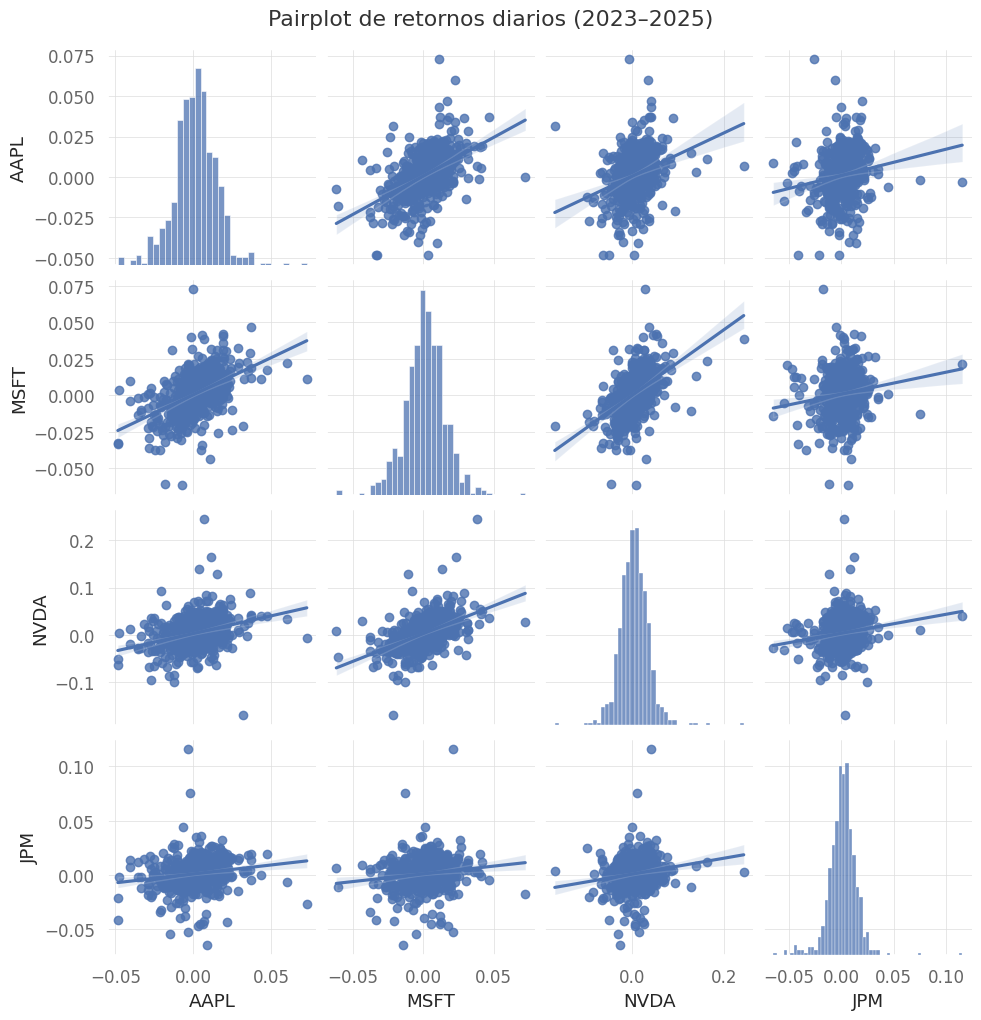

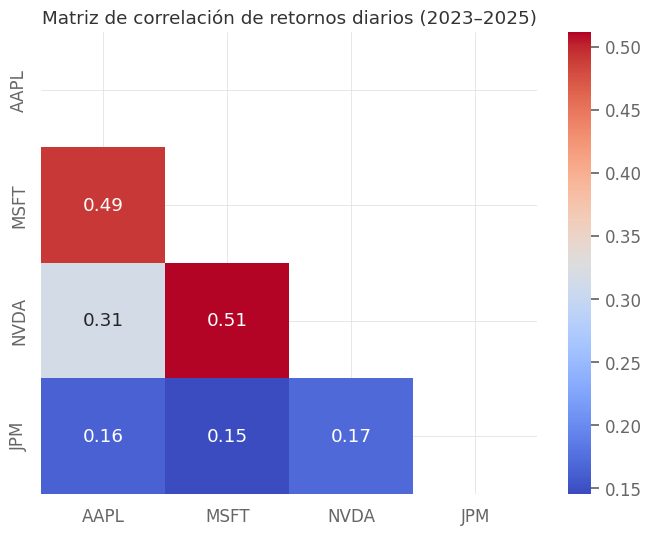

In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Unir los retornos diarios en un único DataFrame
merged_df = pd.concat([aapl, msft, nvda, jpm], axis=1)
merged_df.columns = ['AAPL', 'MSFT', 'NVDA', 'JPM']
merged_df.dropna(inplace=True)  # eliminar filas con valores faltantes

# Pairplot: relaciones bivariadas entre activos
sns.pairplot(merged_df, kind='reg')
plt.suptitle('Pairplot de retornos diarios (2023–2025)', y=1.02)
plt.show()

# Matriz de correlación
corr = merged_df.corr()

# Crear máscara para la diagonal inferior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Matriz de correlación de retornos diarios (2023–2025)')
plt.show()


## Análisis de correlación entre los activos (2023–2025)

La matriz de correlación muestra el grado de relación lineal entre los retornos diarios de las acciones AAPL, MSFT, NVDA y JPM. Los valores se interpretan así:

- **+1.0**: correlación perfectamente positiva (se mueven exactamente igual).
- **0.0**: sin correlación (movimientos independientes).
- **-1.0**: correlación perfectamente negativa (uno sube, el otro baja).

### Principales hallazgos

| Par de activos     | Correlación | Interpretación                                      |
|--------------------|-------------|-----------------------------------------------------|
| MSFT – NVDA        | 0.51        | Correlación moderada positiva. Se mueven algo juntos. |
| AAPL – MSFT        | 0.49        | Alta correlación dentro del sector tecnológico.     |
| AAPL – NVDA        | 0.31        | Correlación baja-moderada, pero todavía significativa. |
| JPM – NVDA/MSFT/AAPL | 0.15–0.17 | Correlación muy baja. Aporta diversificación real.   |

### Interpretación general

- **MSFT y NVDA** son las más correlacionadas, lo cual es esperado al compartir sector (tecnología) y exposición a tendencias similares como inteligencia artificial o digitalización.
- **AAPL y MSFT** también están altamente correlacionadas, lo cual implica que invertir en ambas **no proporciona una diversificación significativa**.
- **JPMorgan (JPM)** es el activo **menos correlacionado** con el resto, lo que lo convierte en una **pieza clave para la diversificación**. Su baja correlación puede amortiguar movimientos del mercado tecnológico, funcionando como una especie de “hedge sectorial”.

---

### Recomendación

Si el objetivo del portafolio es lograr una buena relación **riesgo-retorno**, sería ideal:

- Combinar activos con correlación baja (como JPM + NVDA).
- Evitar sobreponderar activos muy correlacionados (como MSFT y AAPL) sin una justificación clara.
- Considerar activos con correlación negativa (no presentes aquí) como bonos o commodities para protegerse en escenarios de alta volatilidad.

El análisis de correlación es un paso esencial para construir portafolios **resilientes ante choques de mercado** y evitar exposiciones redundantes.


## Beta y Alpha: Medidas de Riesgo y Desempeño Ajustado al Mercado

Las métricas **Beta** y **Alpha** son fundamentales en finanzas para evaluar el comportamiento de un activo en comparación con el mercado general:

### 📊 Beta

El **Beta** mide la **sensibilidad del rendimiento de una acción frente al mercado**. Se interpreta así:

- **Beta = 1**: La acción se mueve igual que el mercado.
- **Beta > 1**: La acción es más volátil que el mercado (más arriesgada).
- **Beta < 1**: La acción es menos volátil (más defensiva).

Por ejemplo, un Beta de 1.3 indica que, en promedio, el activo se mueve un 30% más que el mercado ante los mismos cambios.

### 🧮 Alpha

El **Alpha** mide el rendimiento adicional de una acción con respecto a su rendimiento esperado según su Beta. Es una señal de **desempeño ajustado por riesgo**:

- **Alpha > 0**: La acción **superó** lo que se esperaba por su riesgo.
- **Alpha < 0**: La acción **quedó por debajo** del rendimiento ajustado por riesgo.
- **Alpha ≈ 0**: El activo rindió como se esperaba según su Beta.

Estas métricas se obtienen aplicando una **regresión lineal** de los retornos del activo sobre los retornos del mercado (en este caso, el S&P 500).

A continuación, realizamos los cálculos para nuestras acciones.


In [210]:
import yfinance as yf
import quantstats as qs
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Paso 1: Descargar datos del S&P 500 con la misma estructura y fechas
sp500 = yf.download('^GSPC', start='2023-01-03', end='2025-03-28', auto_adjust=False)['Adj Close']
sp500_returns = sp500.pct_change().dropna()
sp500_returns.index = sp500_returns.index.tz_localize('America/New_York').tz_convert(None)

# Paso 2: Resetear índices para trabajar con arrays puros
sp500_reset = sp500_returns.reset_index(drop=True)
aapl_reset = aapl.dropna().reset_index(drop=True)
msft_reset = msft.dropna().reset_index(drop=True)
nvda_reset = nvda.dropna().reset_index(drop=True)
jpm_reset  = jpm.dropna().reset_index(drop=True)

# Paso 3: Función para calcular Beta y Alpha
def calcular_beta_alpha(activo, benchmark, nombre):
    X = benchmark.values.reshape(-1, 1)
    y = activo.values.reshape(-1, 1)

    modelo = LinearRegression().fit(X, y)
    beta = modelo.coef_[0][0]
    alpha = modelo.intercept_[0]

    print(f'\n{name.upper()}')
    print(f'Beta:  {beta:.3f}')
    print(f'Alpha: {alpha:.4f}')
    return beta, alpha

# Paso 4: Aplicar la función a cada acción
resultados_beta_alpha = {}
for serie, name in zip([aapl_reset, msft_reset, nvda_reset, jpm_reset], ['AAPL', 'MSFT', 'NVDA', 'JPM']):
    beta, alpha = calcular_beta_alpha(serie, sp500_reset, name)
    resultados_beta_alpha[name] = {'Beta': beta, 'Alpha': alpha}


[*********************100%***********************]  1 of 1 completed


AAPL
Beta:  1.016
Alpha: 0.0004

MSFT
Beta:  1.160
Alpha: 0.0001

NVDA
Beta:  2.459
Alpha: 0.0024

JPM
Beta:  0.864
Alpha: 0.0006


## Análisis de Beta y Alpha (2023–2025)

A continuación se presentan los resultados obtenidos de la regresión lineal entre los retornos diarios de cada acción y los del índice S&P 500, que se utilizó como benchmark:

| Activo | Beta  | Alpha     |
|--------|-------|-----------|
| AAPL   | 1.016 | 0.0004    |
| MSFT   | 1.160 | 0.0001    |
| NVDA   | 2.459 | 0.0024    |
| JPM    | 0.864 | 0.0006    |

### Interpretación del Beta

- **NVDA (2.459)**: Presenta un beta muy alto, lo que indica una sensibilidad extrema a los movimientos del mercado. Se comporta como un activo altamente especulativo: cuando el mercado sube, NVDA tiende a subir aún más (y viceversa en mercados bajistas).
- **MSFT (1.160)** y **AAPL (1.016)**: Ambos tienen un beta superior a 1, por lo que **son más volátiles que el mercado**, aunque de forma más moderada. Esto es típico de empresas tecnológicas con crecimiento estable pero aún expuestas a shocks del sector.
- **JPM (0.864)**: Con un beta inferior a 1, JPMorgan presenta una **volatilidad menor que el mercado**, lo que lo hace útil como **activo defensivo** dentro del portafolio, especialmente en entornos de alta incertidumbre.

### Interpretación del Alpha

- Todos los valores de **alpha son positivos pero muy pequeños**, lo que sugiere que:
  - Las acciones han tenido un desempeño **ligeramente superior al que se esperaría** según su beta, es decir, **han generado un exceso de retorno leve** frente a su nivel de riesgo.
  - **NVDA (0.0024)** destaca entre las demás con el mayor alpha, lo que confirma su desempeño superior (aunque con alto riesgo).
  - **MSFT y AAPL**, a pesar de ser líderes estables, presentan alphas cercanos a cero, lo cual indica que han rendido según lo esperado por su riesgo sistémico.
  - **JPM**, siendo más conservador (beta bajo), mantiene un alpha levemente positivo, demostrando eficiencia sin asumir demasiada volatilidad.

---

### Conclusión

- **NVDA** se comporta como un activo de alto riesgo-alta recompensa, ideal para perfiles agresivos o estrategias de crecimiento.
- **MSFT y AAPL** son tecnológicas sólidas con comportamiento muy alineado al mercado.
- **JPM** es una acción más defensiva, útil para mitigar riesgo sin sacrificar completamente el rendimiento.

Estas métricas complementan el análisis de volatilidad, skewness, kurtosis y correlación, y permiten tomar decisiones más informadas para estructurar un portafolio balanceado entre riesgo y rendimiento.


## Ratio de Sharpe: Relación Riesgo-Rendimiento

El **Ratio de Sharpe** es una medida financiera ampliamente utilizada para evaluar la **rentabilidad ajustada al riesgo** de una inversión. Indica cuánta rentabilidad adicional obtiene un inversor por cada unidad de riesgo asumido.

Se define como:

\[
\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
\]

Donde:
- \( R_p \): retorno promedio de la inversión.
- \( R_f \): tasa libre de riesgo (se suele asumir cercana a 0 cuando se trabaja con retornos diarios y periodos cortos).
- \( \sigma_p \): desviación estándar de los retornos, es decir, su volatilidad.

### Interpretación general:
- **Sharpe < 1.0**: relación riesgo-retorno baja (poca eficiencia).
- **Sharpe ≈ 1.0**: inversión razonablemente eficiente.
- **Sharpe > 2.0**: muy buena eficiencia.
- **Sharpe > 3.0**: excelente.

Este ratio permite comparar diferentes activos incluso si tienen distintos niveles de riesgo, ya que los pone en una misma escala ajustada por volatilidad.


In [211]:
import quantstats as qs

# Asegúrate de que las series estén limpias (sin NaNs)
aapl_clean = aapl.dropna()
msft_clean = msft.dropna()
nvda_clean = nvda.dropna()
jpm_clean  = jpm.dropna()

# Calcular y mostrar el Sharpe Ratio para cada activo
print("\nSharpe Ratios (2023–2025):\n")
print("AAPL: ", qs.stats.sharpe(aapl_clean).round(2))
print("MSFT: ", qs.stats.sharpe(msft_clean).round(2))
print("NVDA: ", qs.stats.sharpe(nvda_clean).round(2))
print("JPM:  ", qs.stats.sharpe(jpm_clean).round(2))



Sharpe Ratios (2023–2025):

AAPL:  Ticker
AAPL    1.31
dtype: float64
MSFT:  Ticker
MSFT    1.11
dtype: float64
NVDA:  Ticker
NVDA    2.02
dtype: float64
JPM:   Ticker
JPM    1.45
dtype: float64


## Análisis del Sharpe Ratio (2023–2025)

El **Sharpe Ratio** mide el retorno promedio ajustado por la volatilidad (riesgo). Es una herramienta esencial para evaluar **la eficiencia de una inversión**: cuánto se gana por cada unidad de riesgo asumido.

Los resultados obtenidos fueron:

| Activo | Sharpe Ratio |
|--------|--------------|
| **NVDA** | 2.02 |
| **JPM**  | 1.45 |
| **AAPL** | 1.31 |
| **MSFT** | 1.11 |

### 🧩 Interpretación:

- **NVDA (2.02)**: Obtiene el **mejor desempeño ajustado al riesgo**, superando el umbral de 2.0 que se considera "muy bueno". A pesar de su alta volatilidad, ha entregado retornos significativos. Esto refuerza su perfil como activo de alto rendimiento con riesgo compensado.

- **JPM (1.45)**: Sorprende positivamente como un activo **más conservador** con una eficiencia notable. A pesar de su menor beta y volatilidad, ha logrado una relación riesgo-retorno bastante competitiva.

- **AAPL (1.31)**: Buena eficiencia ajustada al riesgo. Aunque no destaca como la más rentable ni la más estable, ofrece una combinación sólida de retorno y control de riesgo.

- **MSFT (1.11)**: A pesar de ser una acción sólida y estable, su Sharpe Ratio es el más bajo del grupo. Si bien está por encima del umbral aceptable (>1.0), su rentabilidad en relación con su volatilidad no es tan destacada como las demás.

---

###  Conclusión

Todos los activos tienen un Sharpe Ratio **superior a 1**, lo que sugiere que han ofrecido **retornos adecuados en relación al riesgo asumido**. No obstante:

- **NVDA** sobresale como una apuesta de alto riesgo con alto retorno ajustado.
- **JPM** actúa como activo defensivo pero con eficiencia atractiva.
- **AAPL y MSFT** mantienen un perfil balanceado, aunque Microsoft queda algo rezagado en eficiencia.

Este análisis complementa nuestras observaciones previas sobre volatilidad, beta, y alpha, y aporta un criterio clave para construir un portafolio balanceado y rentable.


## Conclusiones Iniciales del Análisis de Retornos y Riesgo (2023–2025)

Tras analizar múltiples métricas cuantitativas sobre el comportamiento de las acciones AAPL, MSFT, NVDA y JPM entre enero de 2023 y marzo de 2025, se obtienen los siguientes hallazgos clave:

### 📈 1. Retornos Acumulados
- **NVDA** superó ampliamente al resto con un crecimiento exponencial.
- **JPM**, **AAPL** y **MSFT** mostraron trayectorias más estables, aunque con menor rentabilidad acumulada.

### 🔍 2. Volatilidad y Distribuciones
- **NVDA** es el activo más volátil, con colas pesadas y alta curtosis, lo que sugiere un comportamiento más propenso a eventos extremos ("black swans").
- **AAPL**, **MSFT** y **JPM** presentan distribuciones más estrechas y simétricas, con menor volatilidad.

### 📊 3. Kurtosis y Skewness
- Todos los activos presentan **kurtosis elevada**, lo que indica mayor probabilidad de retornos extremos.
- La **asimetría (skewness)** es levemente positiva en la mayoría de los casos, indicando una ligera inclinación hacia ganancias, excepto en MSFT, que muestra una leve inclinación negativa.

### 🔗 4. Correlaciones
- La mayor correlación se dio entre **MSFT y NVDA (0.51)** y **AAPL y MSFT (0.49)**, lo que puede implicar riesgo sistémico si se concentran inversiones en estas dos.
- **JPM** mostró baja correlación con el resto, siendo una opción útil para diversificación.

### 📐 5. Beta y Alpha
- **NVDA** presenta el beta más alto (**2.45**), lo que la hace muy sensible al mercado.
- **JPM** tiene un beta inferior a 1, lo que sugiere menor riesgo de mercado.
- Los valores de **alpha** fueron cercanos a cero en todos los casos, indicando que ninguno de los activos ha tenido rendimientos excesivos inesperados respecto al mercado.

### ⚖️ 6. Sharpe Ratio
- Todos los activos superan el umbral mínimo de eficiencia (>1.0).
- **NVDA** destaca con un Sharpe de **2.02**, lo que lo posiciona como el activo con mejor relación retorno-riesgo, a pesar de su alta volatilidad.
- **JPM** también sorprende con buena eficiencia (1.45), reafirmando su perfil defensivo y sólido.

---

### 🧠 Conclusión General

Este análisis permite visualizar cómo diferentes activos combinan rendimiento, riesgo y eficiencia de forma única. Mientras que **NVDA** lidera en retorno y riesgo, **JPM** ofrece estabilidad y eficiencia moderada. **AAPL** y **MSFT** representan posiciones balanceadas, pero MSFT podría evaluarse con cautela por su menor Sharpe y mayor beta relativa.

Estos hallazgos sientan una base sólida para tomar decisiones informadas de inversión o para construir portafolios con objetivos específicos de riesgo y retorno.


# 2 | Portafolios de Inversión

# ¿Qué es un portafolio de Inversión?
Un portafolio de inversión es una combinación de distintos activos financieros (como acciones, bonos, fondos o derivados) seleccionados con el fin de alcanzar un objetivo financiero específico. En el contexto de los mercados bursátiles, un portafolio permite a los inversionistas distribuir su capital entre distintos instrumentos, reduciendo así el riesgo asociado a mantener una sola inversión.

El propósito principal de un portafolio bien construido es maximizar el retorno esperado para un nivel de riesgo determinado, o bien minimizar el riesgo para un nivel de retorno esperado. Esta diversificación ayuda a suavizar las fluctuaciones del mercado, ya que no todos los activos se comportan de la misma manera bajo las mismas condiciones económicas.

En este proyecto, construiremos un portafolio sencillo y balanceado, asignando un peso del 25% a cada una de las siguientes acciones: Apple (AAPL), Microsoft (MSFT), Nvidia (NVDA) y JPMorgan Chase (JPM). Esta estrategia de igual ponderación es útil como punto de partida para evaluar el desempeño general del grupo de activos bajo condiciones de igualdad.

In [212]:
import numpy as np
import pandas as pd

# 1. Asignar pesos iguales
weights = np.array([0.25, 0.25, 0.25, 0.25])

# 2. Combinar los retornos en un solo DataFrame
returns_df = pd.concat([aapl, msft, nvda, jpm], axis=1)
returns_df.columns = ['AAPL', 'MSFT', 'NVDA', 'JPM']

# 3. Calcular retornos diarios ponderados del portafolio
portfolio_returns = (returns_df * weights).sum(axis=1)

# 4. Eliminar valores infinitos y NaN
portfolio_returns = portfolio_returns.replace([np.inf, -np.inf], np.nan).dropna()

# 5. Verificar los primeros valores limpios
print("Primeros valores del portafolio limpio:")
print(portfolio_returns.head())


Primeros valores del portafolio limpio:
Date
2023-01-04    0.001554
2023-01-05   -0.018320
2023-01-06    0.027339
2023-01-09    0.015362
2023-01-10    0.009752
dtype: float64


In [213]:
#############
######################
##############################
# Eliminar NaNs e infinitos de ambas series
portfolio_returns_clean = portfolio_returns.replace([np.inf, -np.inf], np.nan).dropna()
sp500_returns_clean = sp500_returns.replace([np.inf, -np.inf], np.nan).dropna()


In [214]:
# Alinear ambos DataFrames a las fechas comunes
common_dates = portfolio_returns_clean.index.intersection(sp500_returns_clean.index)
portfolio_returns_aligned = portfolio_returns_clean.loc[common_dates]
sp500_returns_aligned = sp500_returns_clean.loc[common_dates]


In [215]:
# Generar precios acumulados desde retornos diarios
portfolio_prices = (1 + portfolio_returns_aligned).cumprod()
sp500_prices = (1 + sp500_returns_aligned).cumprod()


In [173]:
print(portfolio_prices.head())
print(sp500_prices.head())

print(portfolio_prices.isna().sum(), portfolio_prices.isin([np.inf, -np.inf]).sum())
print(sp500_prices.isna().sum(), sp500_prices.isin([np.inf, -np.inf]).sum())


Series([], dtype: float64)
Empty DataFrame
Columns: [^GSPC]
Index: []
0 0
Ticker
^GSPC    0
dtype: int64 Ticker
^GSPC    0
dtype: int64


In [216]:
# Función para evitar que el error de un gráfico detenga el análisis
def generar_reporte_basico(portfolio_returns, benchmark_returns):
    import quantstats as qs

    print("\n📊 Retornos acumulados")
    try:
        qs.plots.returns(portfolio_returns, benchmark=benchmark_returns)
    except Exception as e:
        print("⚠️ Error en returns:", e)

    print("\n📉 Drawdown")
    try:
        qs.plots.drawdown(portfolio_returns)
    except Exception as e:
        print("⚠️ Error en drawdown:", e)

    print("\n🗓️ Mapa de retornos mensuales")
    try:
        qs.plots.monthly_returns_heatmap(portfolio_returns)
    except Exception as e:
        print("⚠️ Error en heatmap:", e)

    print("\n📈 Volatilidad móvil (6 meses)")
    try:
        qs.plots.rolling_volatility(portfolio_returns, benchmark=benchmark_returns)
    except Exception as e:
        print("⚠️ Error en rolling volatility:", e)

    print("\n📊 Sharpe Ratio móvil")
    try:
        qs.plots.rolling_sharpe(portfolio_returns)
    except Exception as e:
        print("⚠️ Error en rolling sharpe:", e)

    print("\n📈 Beta móvil")
    try:
        qs.plots.rolling_beta(portfolio_returns, benchmark=benchmark_returns)
    except Exception as e:
        print("⚠️ Error en rolling beta:", e)

    print("\n🔁 Distribución de retornos diarios")
    try:
        qs.plots.distribution(portfolio_returns)
    except Exception as e:
        print("⚠️ Error en distribution:", e)



📊 Retornos acumulados


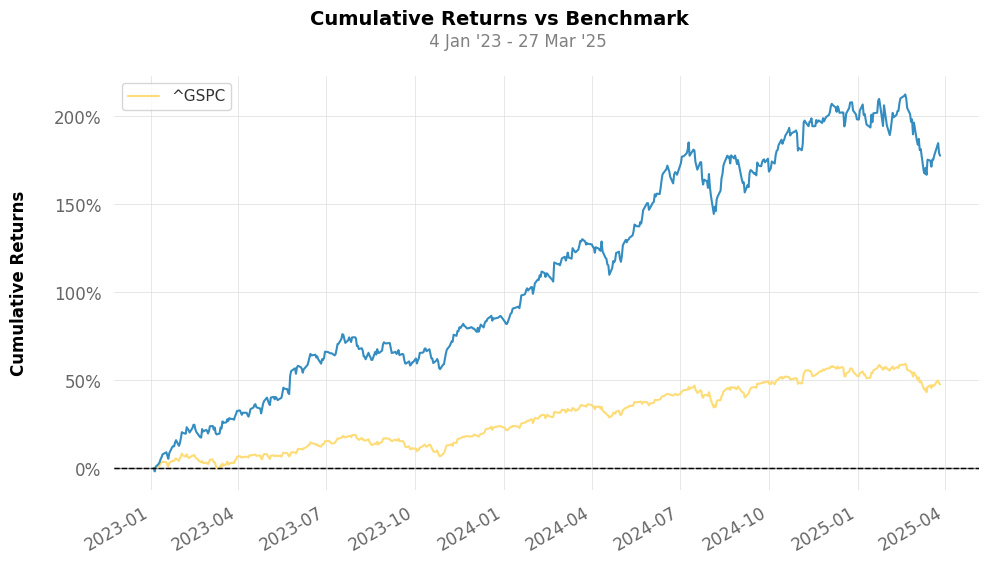


📉 Drawdown


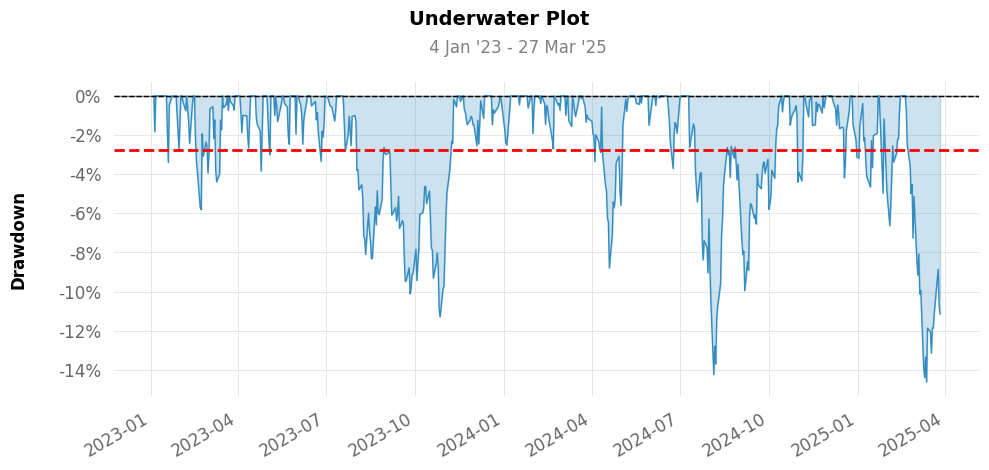


🗓️ Mapa de retornos mensuales
⚠️ Error en heatmap: module 'quantstats.plots' has no attribute 'monthly_returns_heatmap'

📈 Volatilidad móvil (6 meses)


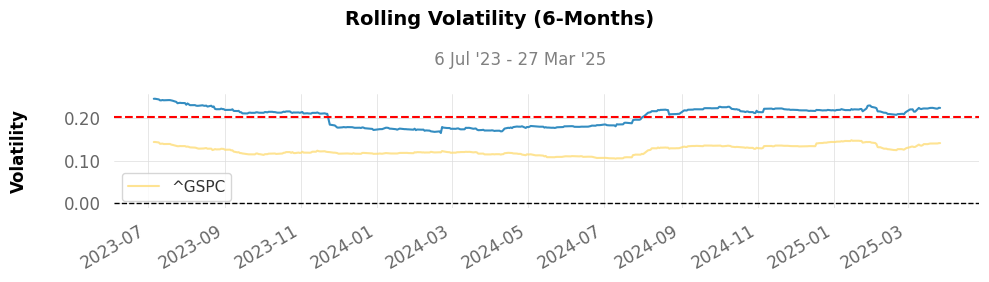


📊 Sharpe Ratio móvil


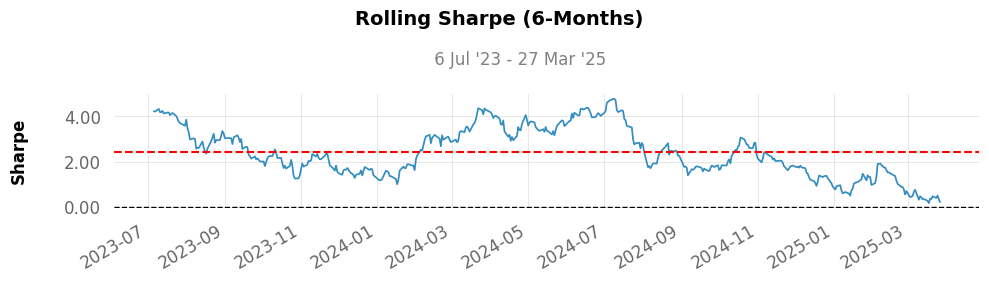


📈 Beta móvil


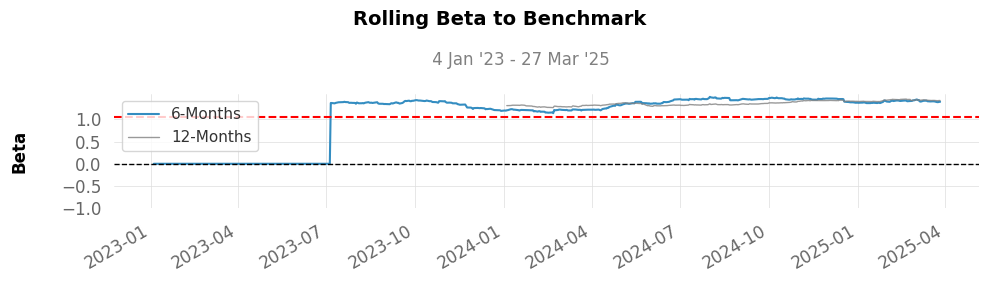


🔁 Distribución de retornos diarios


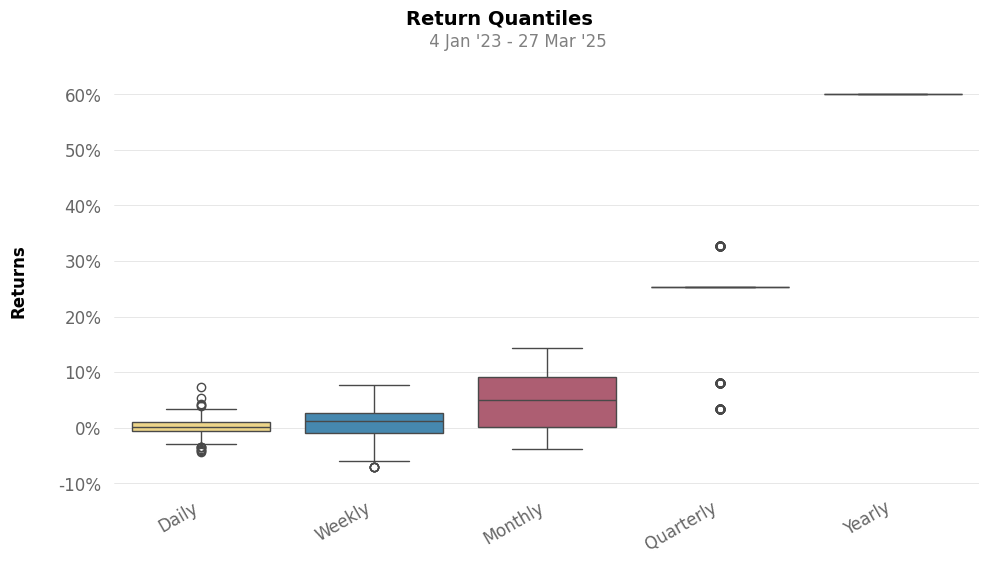

In [217]:
generar_reporte_basico(portfolio_returns, sp500_returns)


In [238]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from IPython.display import display

def calcular_metricas_riesgo_completo(portfolio_returns, benchmark_returns, risk_free_rate=0.0):
    # Normalizar fechas para evitar errores por diferencias en horas
    portfolio_returns.index = pd.to_datetime(portfolio_returns.index).normalize()
    benchmark_returns.index = pd.to_datetime(benchmark_returns.index).normalize()

    # Alinear por fechas comunes y eliminar valores nulos
    data = pd.concat([portfolio_returns, benchmark_returns], axis=1, join='inner').dropna()
    data.columns = ['Strategy', 'Benchmark']

    if data.empty:
        print("⚠️ No hay fechas en común entre el portafolio y el benchmark después de eliminar valores nulos.")
        print("📅 Rango de fechas del portafolio:", portfolio_returns.index.min(), "→", portfolio_returns.index.max())
        print("📅 Rango de fechas del benchmark :", benchmark_returns.index.min(), "→", benchmark_returns.index.max())
        return None

    # Cálculo de métricas para cada serie
    metrics = {}
    for col in data.columns:
        returns = data[col]
        mean_return = returns.mean()
        std_dev = returns.std()
        sharpe_ratio = (mean_return - risk_free_rate) / std_dev * np.sqrt(252)
        max_drawdown = (returns.cumsum() - returns.cumsum().cummax()).min()
        skewness = skew(returns)
        kurt = kurtosis(returns)

        X = data['Benchmark'].values.reshape(-1, 1)
        y = data[col].values.reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        beta = model.coef_[0][0]
        alpha = model.intercept_[0]

        metrics[col] = {
            'Retorno promedio diario': mean_return,
            'Volatilidad diaria': std_dev,
            'Sharpe Ratio (anualizado)': sharpe_ratio,
            'Máximo Drawdown': max_drawdown,
            'Skewness': skewness,
            'Kurtosis': kurt,
            'Beta': beta,
            'Alpha': alpha
        }

    # Convertir a DataFrame
    df_metrics = pd.DataFrame(metrics).round(4)

    print("📊 Métricas de rendimiento comparadas:")
    #display(df_metrics)

    return df_metrics


In [239]:
calcular_metricas_riesgo_completo(portfolio_returns, sp500_returns)


📊 Métricas de rendimiento comparadas:


,Strategy,Benchmark
Retorno promedio diario,0.0019,0.0007
Volatilidad diaria,0.0136,0.0083
Sharpe Ratio (anualizado),2.2385,1.4213
Máximo Drawdown,-0.1548,-0.1065
Skewness,0.1758,-0.2713
Kurtosis,1.7442,0.5903
Beta,1.3747,1.0000
Alpha,0.0009,0.0000


| Métrica                       | Interpretación                                                     | Observación                                                                                                                       |
| ----------------------------- | ------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------- |
| **Retorno promedio diario**   | Mide el rendimiento promedio diario.                               | El portafolio (0.0019) supera claramente al benchmark (0.0007), lo cual es positivo.                                              |
| **Volatilidad diaria**        | Representa el riesgo o variabilidad de los retornos.               | Mayor en el portafolio (0.0136 vs 0.0083), lo cual implica más riesgo.                                                            |
| **Sharpe Ratio (anualizado)** | Retorno ajustado por riesgo; >1 es bueno, >2 excelente.            | El portafolio tiene un Sharpe muy sólido (2.24), superior al benchmark (1.39), indicando mejor compensación por unidad de riesgo. |
| **Máximo Drawdown**           | Pérdida máxima desde un pico.                                      | El portafolio cae más (-15.48% vs -10.65%), reflejando mayor exposición a caídas abruptas.                                        |
| **Skewness**                  | Asimetría en los retornos; positivo indica colas hacia la derecha. | El portafolio tiene sesgo positivo (0.18), lo cual es deseable; el benchmark tiene sesgo negativo.                                |
| **Kurtosis**                  | Mide colas pesadas; >3 implica más eventos extremos.               | Ambos valores < 3 sugieren una distribución algo más normal que lo típico en mercados (aunque sigue habiendo eventos extremos).   |
| **Beta**                      | Sensibilidad al mercado; >1 implica más volatilidad.               | El portafolio es 37% más volátil que el mercado (beta = 1.37), lo que concuerda con su mayor retorno y drawdown.                  |
| **Alpha**                     | Rendimiento extra ajustado por riesgo.                             | Ligero alpha positivo (0.0009) indica que el portafolio aporta valor adicional frente al riesgo sistemático.                      |


El portafolio tiene mayor retorno y mayor riesgo que el benchmark, lo que se refleja en su:

Alta volatilidad,

Mayor drawdown, y

Sharpe superior, lo cual indica que ese riesgo ha sido bien compensado.

Además, su sesgo positivo y ligero alpha positivo sugieren que el portafolio está bien construido, aunque podría beneficiarse de ajustes para reducir su sensibilidad al mercado (beta) y drawdown sin sacrificar demasiado rendimiento.

## Optimización de Portafolios
La optimización de portafolios es un proceso fundamental en finanzas que busca encontrar la combinación ideal de activos que maximice el rendimiento esperado para un nivel dado de riesgo, o bien, que minimice el riesgo para un nivel específico de rendimiento. Esta técnica se basa en la teoría moderna de portafolio desarrollada por Harry Markowitz, la cual plantea que un portafolio bien diversificado puede ofrecer mejores resultados ajustados al riesgo que invertir en activos individuales. Para ello, se consideran variables como los retornos esperados, la volatilidad de cada activo y las correlaciones entre ellos. A través de herramientas como PyPortfolioOpt, es posible implementar de forma práctica modelos de optimización que ayudan a tomar decisiones informadas al construir portafolios eficientes y alineados con los objetivos y tolerancia al riesgo del inversionista.

In [240]:
import yfinance as yf
import pandas as pd

# Definir fechas
start_date = '2023-01-01'
end_date = '2025-03-31'

# Descargar datos uno por uno con auto_adjust=False
aapl = yf.download('AAPL', start=start_date, end=end_date, auto_adjust=False)
aapl['Ticker'] = 'AAPL'

msft = yf.download('MSFT', start=start_date, end=end_date, auto_adjust=False)
msft['Ticker'] = 'MSFT'

nvda = yf.download('NVDA', start=start_date, end=end_date, auto_adjust=False)
nvda['Ticker'] = 'NVDA'

jpm = yf.download('JPM', start=start_date, end=end_date, auto_adjust=False)
jpm['Ticker'] = 'JPM'

# Mostrar las primeras filas de AAPL como ejemplo
aapl.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Ticker
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2023-01-03,123.632523,125.070000,130.899994,124.169998,130.279999,112117500,AAPL
2023-01-04,124.907700,126.360001,128.660004,125.080002,126.889999,89113600,AAPL
2023-01-05,123.583099,125.019997,127.769997,124.760002,127.129997,80962700,AAPL
2023-01-06,128.130219,129.619995,130.289993,124.889999,126.010002,87754700,AAPL
2023-01-09,128.654144,130.149994,133.410004,129.889999,130.470001,70790800,AAPL


In [241]:
# Extraer solo la columna de precios ajustados
aapl_prices = aapl['Adj Close']
msft_prices = msft['Adj Close']
nvda_prices = nvda['Adj Close']
jpm_prices  = jpm['Adj Close']

# Renombrar las series
aapl_prices.name = 'AAPL'
msft_prices.name = 'MSFT'
nvda_prices.name = 'NVDA'
jpm_prices.name  = 'JPM'

# Concatenar en un único DataFrame de precios ajustados
price_df = pd.concat([aapl_prices, msft_prices, nvda_prices, jpm_prices], axis=1)

# Verificar el resultado
price_df.head()


Ticker,AAPL,MSFT,NVDA,JPM
Date,,,,
2023-01-03,123.632523,235.240005,14.303279,126.709831
2023-01-04,124.907700,224.949890,14.736924,127.891441
2023-01-05,123.583099,218.282883,14.253322,127.863075
2023-01-06,128.130219,220.855408,14.846834,130.309830
2023-01-09,128.654144,223.005737,15.615206,129.771362


In [242]:
mu = expected_returns.mean_historical_return(price_df, frequency=252)
S = risk_models.sample_cov(price_df, frequency=252)

print(f'Mu :{mu}')

print(f'S:{S}')

Mu :Ticker
AAPL    0.290494
MSFT    0.239095
NVDA    1.500884
JPM     0.336403
dtype: float64
S:Ticker      AAPL      MSFT      NVDA       JPM
Ticker                                        
AAPL    0.049736  0.025472  0.036970  0.008407
MSFT    0.025472  0.053126  0.062008  0.007798
NVDA    0.036970  0.062008  0.276294  0.020228
JPM     0.008407  0.007798  0.020228  0.050343


In [243]:
# 3. Inicializar el modelo de frontera eficiente y optimizar con Sharpe Ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

In [244]:
# 4. Limpiar los pesos (redondea y elimina valores muy pequeños)
clean_weights = ef.clean_weights()
print("Pesos óptimos:\n", clean_weights)

Pesos óptimos:
 OrderedDict([('AAPL', 0.13252), ('MSFT', 0.0), ('NVDA', 0.45429), ('JPM', 0.41319)])


In [245]:
# 5. Construir nuevo portafolio optimizado con los pesos calculados
# Suponiendo que los retornos diarios de las acciones individuales ya están definidos:
optimized_portfolio = sum([retornos[ticker] * weight for ticker, weight in clean_weights.items()])




📊 Retornos acumulados


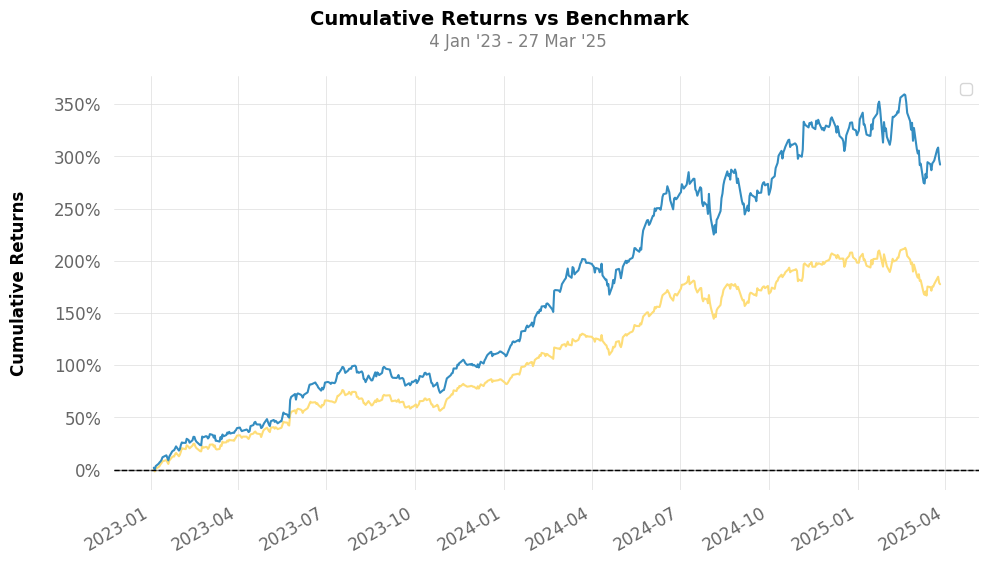


📉 Drawdown


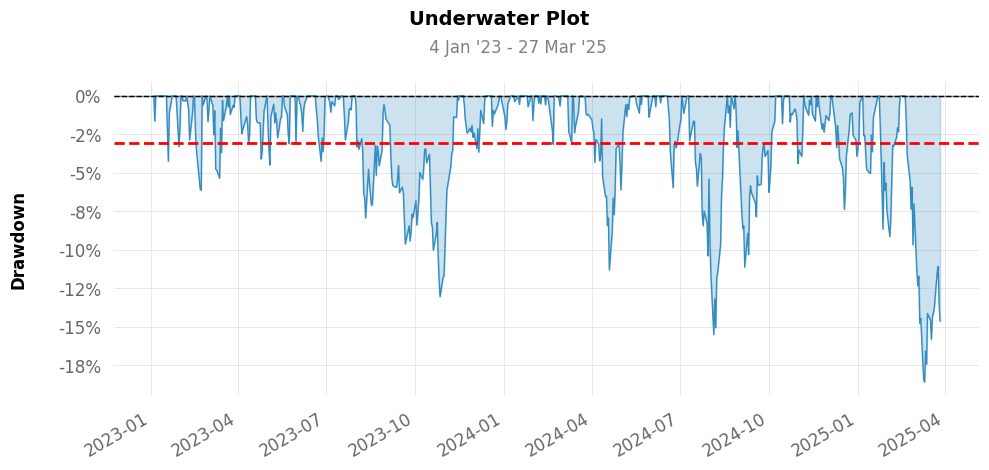


🗓️ Mapa de retornos mensuales
⚠️ Error en heatmap: module 'quantstats.plots' has no attribute 'monthly_returns_heatmap'

📈 Volatilidad móvil (6 meses)


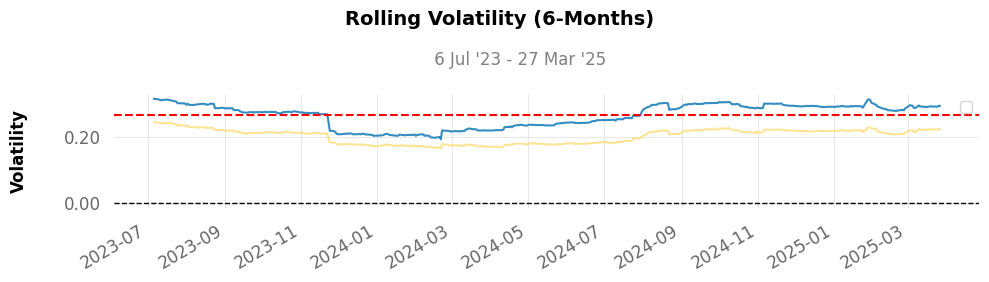


📊 Sharpe Ratio móvil


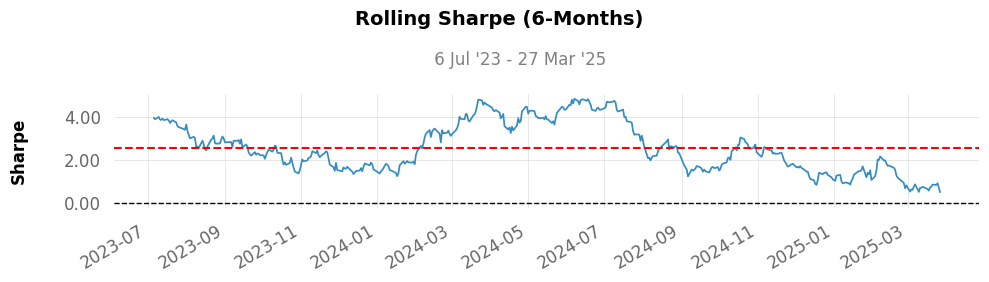


📈 Beta móvil


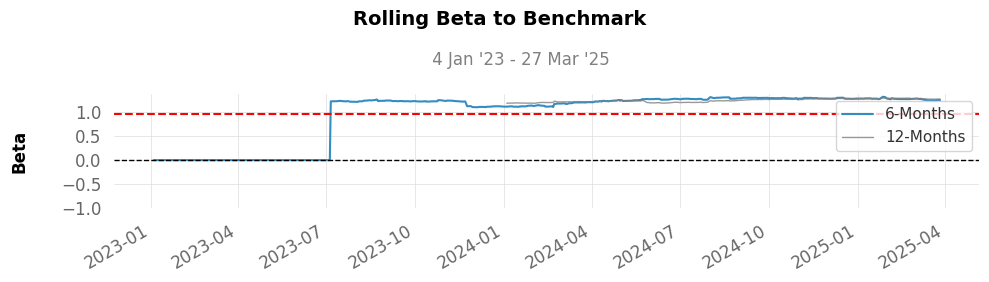


🔁 Distribución de retornos diarios


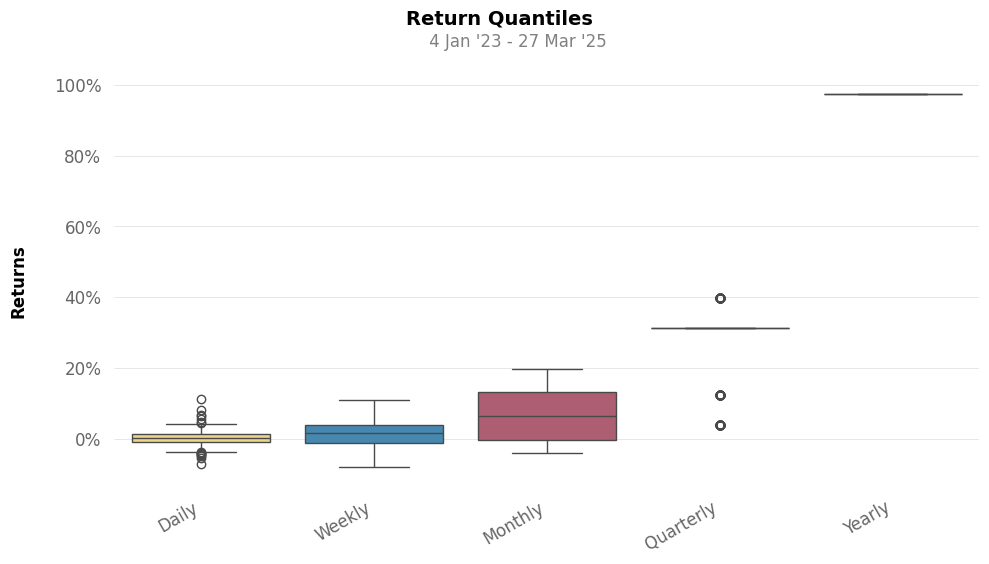

In [246]:
# 6. Evaluar el nuevo portafolio contra el portafolio inicial (benchmark)
generar_reporte_basico(optimized_portfolio, portfolio_returns)


In [250]:
# Calculamos las medidas de rendimiento entre el primer portafolio y el portafolio optimizado

calcular_metricas_riesgo_completo(optimized_portfolio, portfolio_returns)

📊 Métricas de rendimiento comparadas:


,Strategy,Benchmark
Retorno promedio diario,0.0026,0.0019
Volatilidad diaria,0.0177,0.0136
Sharpe Ratio (anualizado),2.3290,2.2385
Máximo Drawdown,-0.2005,-0.1548
Skewness,0.4604,0.1758
Kurtosis,3.7821,1.7442
Beta,1.2349,1.0000
Alpha,0.0002,0.0000


| Métrica                     | Portafolio Óptimo (`Strategy`) | Portafolio Inicial (`Benchmark`) |
| --------------------------- | ------------------------------ | -------------------------------- |
| **Retorno promedio diario** | 0.0026 (0.26%)                 | 0.0019 (0.19%)                   |
| **Volatilidad diaria**      | 0.0177                         | 0.0136                           |
| **Sharpe Ratio anualizado** | **2.3290**                     | 2.2385                           |
| **Máximo Drawdown**         | -20.05%                        | -15.48%                          |
| **Skewness**                | 0.4604                         | 0.1758                           |
| **Kurtosis**                | 3.7821                         | 1.7442                           |
| **Beta**                    | 1.2349                         | 1.0000                           |
| **Alpha**                   | 0.0002                         | 0.0000                           |


Observaciones:
✅ Mejor rendimiento esperado: El portafolio optimizado logra un retorno promedio diario superior al benchmark (0.26% vs 0.19%).

✅ Sharpe Ratio mayor: Esto indica una mejor relación rendimiento/riesgo, a pesar del ligero incremento en la volatilidad.

⚠️ Mayor riesgo extremo: El Drawdown máximo es más profundo, sugiriendo que, si bien la rentabilidad esperada es mayor, también lo es la exposición a caídas significativas.

📈 Mayor asimetría y colas pesadas: El aumento en Skewness y Kurtosis implica un comportamiento más riesgoso y menos simétrico que el benchmark.

🔺 Beta superior a 1: Indica mayor sensibilidad al mercado. El portafolio tiende a amplificar los movimientos del benchmark.

💡 Interpretación final:
El portafolio optimizado logra mejor rentabilidad ajustada por riesgo en términos del Sharpe Ratio, pero conlleva mayor exposición a eventos extremos y mayor sensibilidad al mercado. Este resultado es coherente con un perfil de inversionista que busca mejorar su retorno asumiendo riesgos adicionales de manera controlada.

#Introducción al Modelo Black-Litterman
El modelo Black-Litterman, propuesto en 1992 por Fischer Black y Robert Litterman (de Goldman Sachs), es un enfoque bayesiano para la asignación óptima de activos. A diferencia del modelo de media-varianza tradicional de Markowitz, Black-Litterman permite incorporar de forma estructurada las opiniones del inversionista en la construcción del portafolio.

Este modelo parte de una distribución a priori de los rendimientos esperados, que se basa en el equilibrio del mercado (por ejemplo, las ponderaciones del índice de mercado), y la combina con las opiniones subjetivas del inversionista sobre ciertos activos, ponderadas según el grado de confianza en dichas opiniones. El resultado es una distribución a posteriori de rendimientos esperados más robusta y realista.

📌 Elementos clave del modelo:
Pi (π): Retornos implícitos del mercado, calculados a partir de la aversión al riesgo y las ponderaciones de capitalización.

Q: Vector que contiene las opiniones del inversionista (por ejemplo, "AAPL subirá 5%").

P: Matriz que representa a qué activos aplican las opiniones.

Ω (Omega): Matriz de covarianza de las opiniones, relacionada con el nivel de confianza.

El modelo es especialmente útil en contextos donde se desea:

Evitar estimaciones inestables de retornos esperados.

Incorporar creencias informadas o conocimiento externo.

Obtener portafolios diversificados, estables y realistas.



In [252]:
import yfinance as yf
import pandas as pd

# Lista de acciones
tickers = ['AAPL', 'MSFT', 'GOOG', 'NVDA']
benchmark_ticker = '^GSPC'

# Rango de fechas
start_date = '2023-01-01'
end_date = '2025-03-31'

# Descargar precios ajustados
data = yf.download(tickers + [benchmark_ticker], start=start_date, end=end_date, auto_adjust=False)['Adj Close']

# Separar precios de acciones y benchmark
price_df = data[tickers]
benchmark_prices = data[benchmark_ticker]

# Verificar los primeros valores
print("📈 Precios ajustados de acciones:")
print(price_df.head())

print("\n📉 Precios ajustados del benchmark:")
print(benchmark_prices.head())


[*********************100%***********************]  5 of 5 completed

📈 Precios ajustados de acciones:
Ticker            AAPL        MSFT       GOOG       NVDA
Date                                                    
2023-01-03  123.632523  235.240005  89.277145  14.303279
2023-01-04  124.907700  224.949890  88.291817  14.736924
2023-01-05  123.583099  218.282883  86.360947  14.253322
2023-01-06  128.130219  220.855408  87.744392  14.846834
2023-01-09  128.654144  223.005737  88.381378  15.615206

📉 Precios ajustados del benchmark:
Date
2023-01-03    3824.139893
2023-01-04    3852.969971
2023-01-05    3808.100098
2023-01-06    3895.080078
2023-01-09    3892.090088
Name: ^GSPC, dtype: float64


¿Qué es π?
En el modelo Black-Litterman, π representa los retornos implícitos del mercado. Estos se obtienen a partir de:

La aversión al riesgo del mercado (δ, delta), que mide cuánto retorno exige el mercado por asumir riesgo.

La matriz de covarianza de los activos (Σ).

Las ponderaciones de capitalización de mercado de los activos (w_mkt).

Se calcula con la fórmula:

𝜋
=
𝛿
⋅
Σ
⋅
𝑤
𝑚
𝑘
𝑡
π=δ⋅Σ⋅w
mkt
​



¿Qué necesitamos?
Matriz de covarianza de precios (Σ)

Market caps de las acciones (puedes asignarlas manualmente si no las extraes automáticamente).

Delta: aversión al riesgo, calculada a partir del benchmark (^GSPC) con market_implied_risk_aversion().

In [253]:
from pypfopt import risk_models, black_litterman

# 1. Calcular matriz de covarianza anualizada (Σ)
S = risk_models.sample_cov(price_df, frequency=252)

# 2. Definir capitalización de mercado (valores simulados en USD)
market_caps = {
    'AAPL': 2.5e12,
    'MSFT': 2.2e12,
    'GOOG': 1.6e12,
    'NVDA': 1.1e12
}

# 3. Calcular delta (aversión al riesgo del mercado) usando el benchmark
delta = black_litterman.market_implied_risk_aversion(benchmark_prices)

# 4. Calcular retornos implícitos del mercado (π)
pi = black_litterman.market_implied_prior_returns(market_caps, delta, S)

# Mostrar resultados
print("📌 Aversión al riesgo del mercado (delta):", round(delta, 4))
print("\n📈 Retornos implícitos del mercado (π):")
print(pi)


📌 Aversión al riesgo del mercado (delta): 10.1153

📈 Retornos implícitos del mercado (π):
Ticker
AAPL    0.366112
MSFT    0.419692
GOOG    0.491729
NVDA    0.859591
dtype: float64


¿Qué son las views en Black-Litterman?
Son las opiniones subjetivas del inversionista sobre el comportamiento futuro de uno o varios activos. Estas se expresan con:

P: matriz que indica a qué activos afecta cada opinión.

Q: vector con los valores esperados de retorno para esas opiniones.

Ω: matriz de varianzas (confianza), que indica cuánta certeza tiene el inversionista en cada view.

📘 Ejemplo típico
Supongamos que crees lo siguiente:

"MSFT tendrá un 4% más de rendimiento que AAPL".

"GOOG tendrá un retorno absoluto de 6%".

Eso se traduce así:

P = [[-1, 1, 0, 0], [0, 0, 1, 0]]

Q = [0.04, 0.06]



In [254]:
import numpy as np

# Definir views:
# View 1: MSFT - AAPL = 4% esperado
# View 2: GOOG = 6% retorno absoluto

P = np.array([
    [-1, 1, 0, 0],  # MSFT > AAPL
    [0, 0, 1, 0]    # GOOG retorno absoluto
])

Q = np.array([
    0.04,  # 4% de diferencia entre MSFT y AAPL
    0.06   # 6% de retorno esperado para GOOG
])


**#Construcción del modelo Black-Litterman combinando:**

Los retornos implícitos del mercado (π)

La matriz de covarianza (Σ)

Tus opiniones (P, Q)

El nivel de confianza (usaremos el enfoque de Idzorek para simplificar)

In [256]:
from pypfopt.black_litterman import BlackLittermanModel

# Define absolute views as a dictionary
absolute_views = {
    "MSFT": 0.10,  # Expected return for MSFT
    "GOOG": 0.06   # Expected return for GOOG
}

# 1. Construir el modelo Black-Litterman con views e incertidumbre tipo "idzorek"
bl = BlackLittermanModel(
    cov_matrix=S,
    pi=pi,
    absolute_views=absolute_views,  # Pass the absolute_views dictionary
    Q=Q,
    P=P,
    omega="idzorek",
    view_confidences=[0.75, 0.60],
)

# 2. Obtener los retornos combinados (posteriori) y la matriz de covarianza ajustada
bl_return = bl.bl_returns()
bl_cov = bl.bl_cov()

# Ver resultados
print("📈 Retornos Black-Litterman (posteriori):")
print(bl_return)

print("\n📊 Matriz de covarianza combinada:")
print(bl_cov)

📈 Retornos Black-Litterman (posteriori):
Ticker
AAPL    0.217313
MSFT    0.160845
GOOG    0.182644
NVDA    0.520700
dtype: float64

📊 Matriz de covarianza combinada:
Ticker      AAPL      MSFT      GOOG      NVDA
Ticker                                        
AAPL    0.051663  0.025733  0.029612  0.037525
MSFT    0.025733  0.053757  0.036624  0.062683
GOOG    0.029612  0.036624  0.089371  0.060694
NVDA    0.037525  0.062683  0.060694  0.287084


In [257]:
from pypfopt.efficient_frontier import EfficientFrontier

# 1. Crear frontera eficiente con Black-Litterman (retornos y covarianza)
ef = EfficientFrontier(bl_return, bl_cov)

# 2. Maximizar el Sharpe ratio
bl_weights = ef.max_sharpe()

# 3. Limpiar los pesos para redondearlos
bl_clean_weights = ef.clean_weights()

# 4. Mostrar los pesos óptimos
print("🎯 Pesos del portafolio Black-Litterman:")
for ticker, weight in bl_clean_weights.items():
    print(f"{ticker}: {round(weight * 100, 2)}%")

# 5. Mostrar métricas esperadas del portafolio
ef.portfolio_performance(verbose=True)


🎯 Pesos del portafolio Black-Litterman:
AAPL: 68.76%
MSFT: 0.0%
GOOG: 1.1%
NVDA: 30.14%
Expected annual return: 30.8%
Annual volatility: 25.9%
Sharpe Ratio: 1.19


(np.float64(0.3083761132391971),
 np.float64(0.2586924177368332),
 np.float64(1.1920570225328635))

In [258]:
# Asegurarte de tener los retornos diarios de las acciones
daily_returns = price_df.pct_change().dropna()

# Construir el portafolio usando los pesos de Black-Litterman
bl_portfolio_returns = sum([
    daily_returns[ticker] * weight for ticker, weight in bl_clean_weights.items()
])

# Eliminar posibles valores nulos
bl_portfolio_returns = bl_portfolio_returns.dropna()

# Renombrar la serie
bl_portfolio_returns.name = "Portafolio_Black_Litterman"

# Mostrar primeros valores
bl_portfolio_returns.head()


,Portafolio_Black_Litterman
Date,
2023-01-04,0.016109
2023-01-05,-0.017423
2023-01-06,0.038027
2023-01-09,0.018490
2023-01-10,0.008538



📊 Retornos acumulados


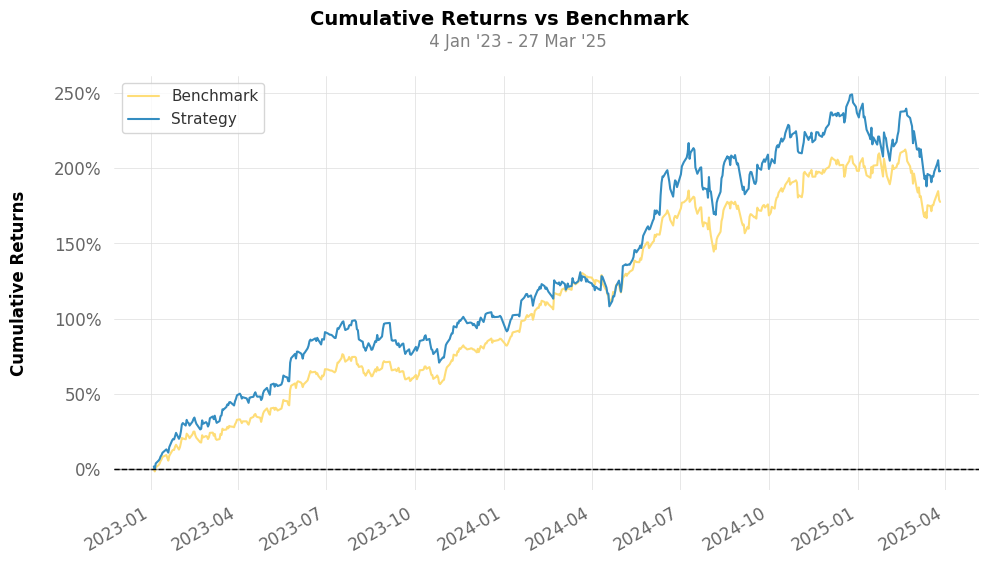


📉 Drawdown


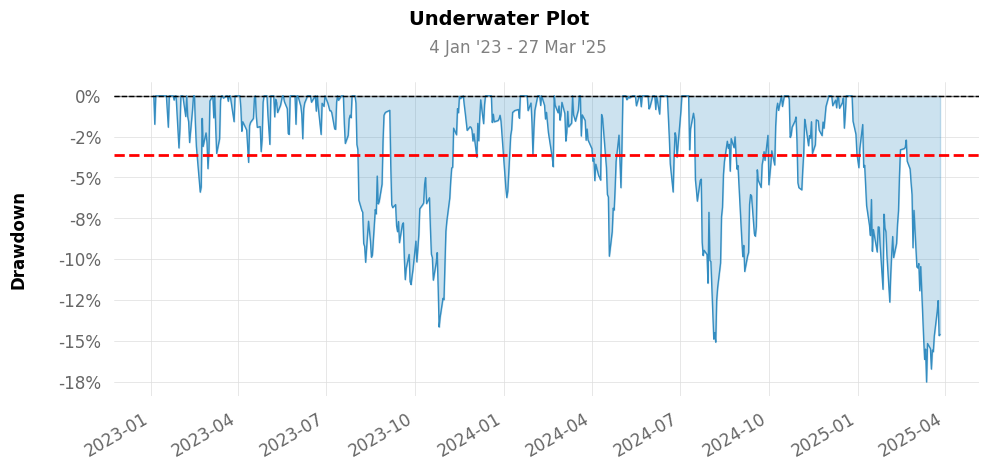


🗓️ Mapa de retornos mensuales
⚠️ Error en heatmap: module 'quantstats.plots' has no attribute 'monthly_returns_heatmap'

📈 Volatilidad móvil (6 meses)


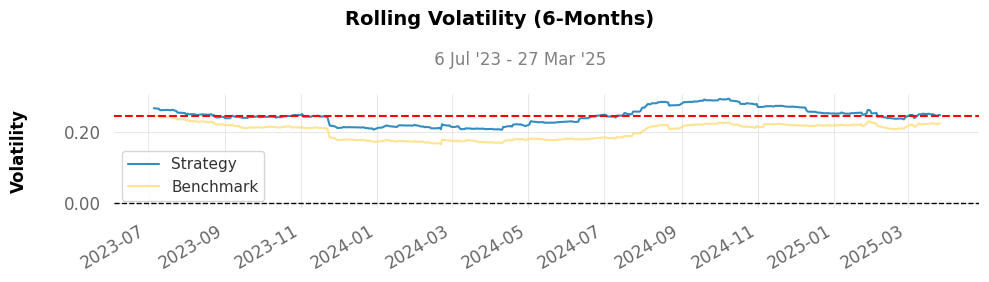


📊 Sharpe Ratio móvil


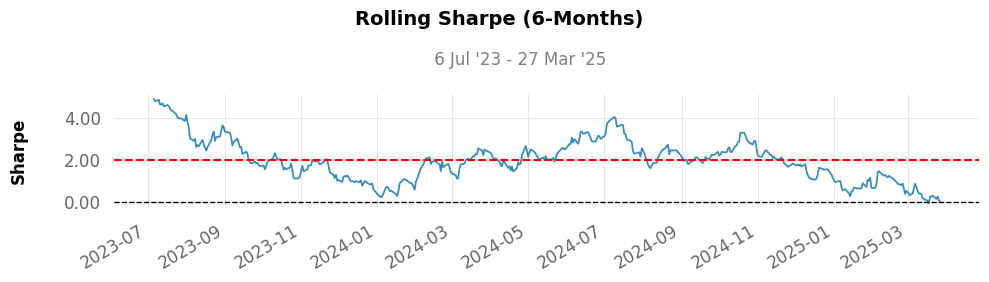


📈 Beta móvil


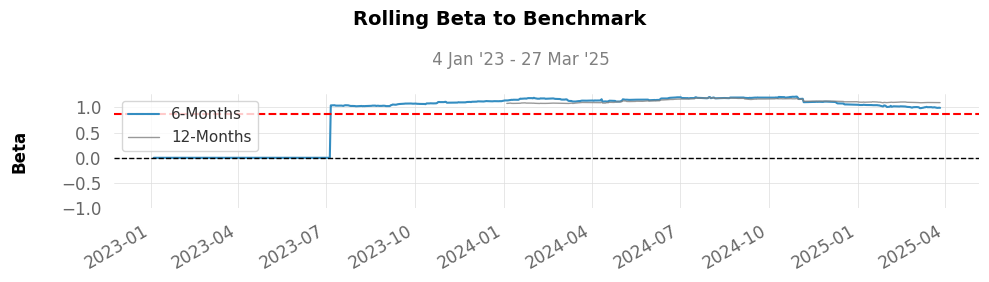


🔁 Distribución de retornos diarios


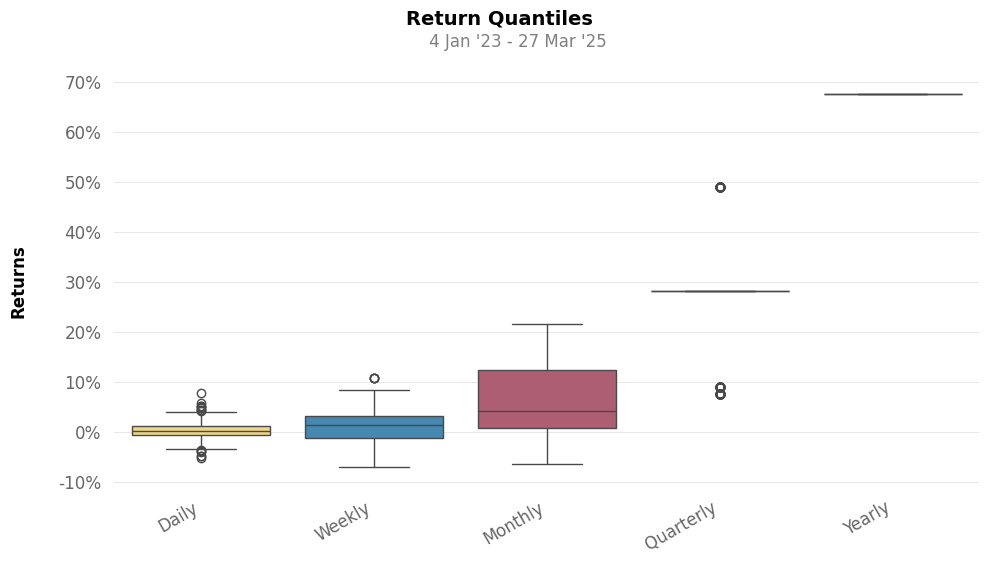

📊 Métricas de rendimiento comparadas:


,Strategy,Benchmark
Retorno promedio diario,0.0021,0.0019
Volatilidad diaria,0.0160,0.0136
Sharpe Ratio (anualizado),2.0656,2.2385
Máximo Drawdown,-0.1828,-0.1548
Skewness,0.1743,0.1758
Kurtosis,1.5315,1.7442
Beta,1.0846,1.0000
Alpha,0.0000,0.0000


In [261]:
# Asegurar que ambos estén en las mismas fechas (eliminar diferencias por zona horaria y hora)
bl_portfolio_returns.index = pd.to_datetime(bl_portfolio_returns.index).normalize()

# Si estás comparando contra el SP500
#sp500_returns.index = pd.to_datetime(sp500_returns.index).normalize()

# Si estás comparando contra el portafolio con pesos iguales
portfolio_returns.index = pd.to_datetime(portfolio_returns.index).normalize()


# Alinear por fechas comunes
combined = pd.concat([bl_portfolio_returns, portfolio_returns], axis=1, join='inner').dropna()
combined.columns = ['Strategy', 'Benchmark']

# Separar
strategy = combined['Strategy']
benchmark = combined['Benchmark']

# Comparar con funciones personalizadas
generar_reporte_basico(strategy, benchmark)
calcular_metricas_riesgo_completo(strategy, benchmark)


In [263]:
# Asegurar que ambos estén alineados por fechas
bl_portfolio_returns.index = pd.to_datetime(bl_portfolio_returns.index).normalize()
portfolio_returns.index = pd.to_datetime(portfolio_returns.index).normalize()

# Concatenar las dos series y eliminar valores nulos
comparison_data = pd.concat([bl_portfolio_returns, portfolio_returns], axis=1, join='inner').dropna()
comparison_data.columns = ['Strategy', 'Benchmark']

# Calcular métricas
calcular_metricas_riesgo_completo(
    comparison_data['Strategy'],
    comparison_data['Benchmark']
)


📊 Métricas de rendimiento comparadas:


,Strategy,Benchmark
Retorno promedio diario,0.0021,0.0019
Volatilidad diaria,0.0160,0.0136
Sharpe Ratio (anualizado),2.0656,2.2385
Máximo Drawdown,-0.1828,-0.1548
Skewness,0.1743,0.1758
Kurtosis,1.5315,1.7442
Beta,1.0846,1.0000
Alpha,0.0000,0.0000


| Métrica                       | Strategy (BL) | Benchmark | Observación                                                                                                                  |
| ----------------------------- | ------------- | --------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **Retorno promedio diario**   | 0.0021        | 0.0019    | La estrategia optimizada con Black-Litterman genera un retorno promedio diario ligeramente superior.                         |
| **Volatilidad diaria**        | 0.0160        | 0.0136    | El portafolio optimizado tiene mayor volatilidad, indicando un riesgo ligeramente más alto.                                  |
| **Sharpe Ratio (anualizado)** | 2.0656        | 2.2385    | A pesar del mayor retorno, la eficiencia ajustada por riesgo es menor que el benchmark. El ratio Sharpe cayó.                |
| **Máximo Drawdown**           | -0.1828       | -0.1548   | El drawdown máximo del portafolio Black-Litterman fue más severo, lo que indica una mayor pérdida acumulada potencial.       |
| **Skewness**                  | 0.1743        | 0.1758    | Ambas distribuciones son ligeramente asimétricas hacia la derecha, sin diferencias relevantes.                               |
| **Kurtosis**                  | 1.5315        | 1.7442    | Ambos tienen colas ligeras comparadas con una distribución normal (k=3), pero el benchmark presenta un poco más de extremos. |
| **Beta**                      | 1.0846        | 1.0000    | El portafolio Black-Litterman tiene una sensibilidad ligeramente mayor al mercado.                                           |
| **Alpha**                     | 0.0000        | 0.0000    | No se observa alpha (exceso de retorno ajustado al riesgo) frente al benchmark.                                              |


Aunque el portafolio Black-Litterman logra un mayor retorno promedio diario, su Sharpe ratio es inferior al del benchmark, lo que indica que ese rendimiento adicional no compensa del todo el mayor riesgo incurrido. Además, el drawdown más profundo refuerza que el perfil de riesgo del portafolio optimizado puede ser más agresivo.

Conclusión: Esta versión de Black-Litterman mejora en rendimiento bruto pero pierde eficiencia ajustada por riesgo. Puede interesar si se prioriza retorno sobre estabilidad.